## F2 STO-3G

In [2]:
import numpy as np
from pyscf import gto,scf,fci,cc,mp

mol = gto.Mole()
natoms = 2
distance = np.linspace(0.1, 6.0, 60)
n = len(distance)
energy_RHF = np.zeros(n)
energy_UHF = np.zeros(n)
energy_FCI = np.zeros(n)
energy_CCSD = np.zeros(n)
energy_UCCSD = np.zeros(n)
energy_MP2 = np.zeros(n)

## SP

In [3]:
R = 1.0
mol.atom = [['F',(0.0, 0.0, 0.0)],['F',(0.0, 0.0, R)]]
mol.basis = 'sto3g' 
mol.verbose = 5
mol.build()

molRHF = scf.RHF(mol) 
molRHF.kernel()    
dm0 = molRHF.make_rdm1()
dm0r1 = dm0
print('dm0:', dm0.shape)

molFCI = fci.FCI(mol, molRHF.mo_coeff)
molFCI.nroots = 2
result = molFCI.kernel()
print(result[0])
print(result[1][0])

molCCSD = cc.CCSD(molRHF)
energy_CCSD = molCCSD.kernel()[0] + energy_RHF

System: uname_result(system='Linux', node='localhost.localdomain', release='3.10.0-957.el7.x86_64', version='#1 SMP Thu Nov 8 23:39:32 UTC 2018', machine='x86_64', processor='x86_64')  Threads 72
Python 3.7.0 (default, Oct  9 2018, 10:31:47) 
[GCC 7.3.0]
numpy 1.19.4  scipy 1.5.4
Date: Wed Nov 25 09:56:02 2020
PySCF version 1.7.5
PySCF path  /home/dell/.local/lib/python3.7/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 5
[INPUT] max_memory = 4000 
[INPUT] num. atoms = 2
[INPUT] num. electrons = 18
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT]  1 F      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.000000000000 Bohr
[INPUT]  2 F      0.000000000000   0.000000000000   1.000000000000 AA    0.000000000000   0.000000000000   1.889726124565 Bohr
[INPUT] ---------------- BASIS SET ---------------- 
[INPUT] l, kappa, [nprim/nctr], expnt,        

    CPU time for CCSD     24.24 sec, wall time      0.38 sec
CCSD converged
E(CCSD) = -195.6610863231109  E_corr = -0.02304486446591423


## RHF CCSD MP2 FCI

In [4]:
dm0 = dm0r1.copy()
for i,R in enumerate(distance):
    mol.atom = [['F',(0.0, 0.0, 0.0)],['F',(0.0, 0.0, R)]]
    mol.basis = 'sto3g' #cc-pvdz' #6-31g'#sto-3g'#cc-pvdz' #'dzp' #6-31g'#sto-3g' #6-31g'
    mol.build()
    
    molRHF = scf.RHF(mol) 
    energy_RHF[i] = molRHF.kernel(dm0=dm0)
  
    molFCI = fci.FCI(mol, molRHF.mo_coeff)
    molFCI.nroots = 2
    molFCI = fci.addons.fix_spin_(molFCI, ss=0) # S*(S+1)
    energy_FCI[i] = molFCI.kernel()[0][0]
    
    molMP2 = mp.MP2(molRHF)
    energy_MP2[i] = molMP2.kernel()[0] + energy_RHF[i]
    
    molCCSD = cc.CCSD(molRHF)
    molCCSD.conv_tol = 1e-6
    molCCSD.max_cycle = 1000
    molCCSD.diis_space = 20
    if i==0:
        e,t1,t2 = molCCSD.kernel()
    else:
        e,t1,t2 = molCCSD.kernel(t1,t2)            
    energy_CCSD[i] = e + energy_RHF[i]
    print("R=",R)
    assert molCCSD.converged == True




******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp9wocwwd3
max_memory 4000 MB (current use 190 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -530.9721258595791  E_coul = 111.29723349244124
init E= 8.95864847806206
cond(S) = 1595.0182906255025
    CPU time for initialize scf      4.53 sec, wall time      0.07 sec
  HOMO = -1.50020447434983  LUMO = 8.38159353410322
  mo_energy =
[-66.39272738 -24.19153331  -8.2240898   -6.96485362  -6.96485362
  -3.60493011  -1.65140482  -1.50020447  -1.50020447   8.38159353]
E1 = -524.6980547218456  E_coul = 171.15717392289116
cycle= 1 E= 75.0926600462456  delta_E= 66.1  |g|= 1.15  |ddm|=  144
    CPU time for cycle= 1      0.45 sec, wall

Overwritten attributes  contract_2e  of <class 'pyscf.fci.FCI.<locals>.CISolver'>


davidson 1 4  |r|= 0.229  e= [-353.5891897  -343.40725306]  max|de|= -0.0237  lindep= 0.512
davidson 2 6  |r|= 0.715  e= [-353.58919839 -343.44834083]  max|de|= -0.0411  lindep= 0.939
davidson 3 8  |r|= 0.0791  e= [-353.58919839 -343.54936872]  max|de|= -0.101  lindep= 0.95
root 0 converged  |r|= 2.81e-07  e= -353.58919838956064  max|de|= -1.76e-12
davidson 4 10  |r|= 0.0112  e= [-353.58919839 -343.54951397]  max|de|= -0.000145  lindep= 0.889
davidson 5 11  |r|= 0.00109  e= [-353.58919839 -343.54951769]  max|de|= -3.72e-06  lindep= 0.955
davidson 6 12  |r|= 6.53e-05  e= [-353.58919839 -343.54951773]  max|de|= -3.88e-08  lindep= 0.986
davidson 7 13  |r|= 5.37e-06  e= [-353.58919839 -343.54951773]  max|de|= -2.38e-10  lindep= 0.988
root 1 converged  |r|= 6.87e-07  e= -343.5495177330204  max|de|= -1.53e-12
converged 8 14  |r|= 6.87e-07  e= [-353.58919839 -343.54951773]  max|de|= -1.53e-12

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 9, nmo = 10
max_memory 4000 MB (current use 247 

diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpgf0ikkb_
max_memory 4000 MB (current use 248 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -423.82315710163573  E_coul = 115.62345110041751
init E= -165.321859052818
cond(S) = 544.3271847888461
    CPU time for initialize scf      1.82 sec, wall time      0.03 sec
  HOMO = -1.28843164377659  LUMO = 7.6900100217347
  mo_energy =
[-35.93922853 -31.9861888   -5.38914319  -5.13145808  -5.13145808
  -3.07632243  -2.39160479  -1.28843164  -1.28843164   7.69001002]
E1 = -457.173106414574  E_coul = 159.4344133245739
cycle= 1 E= -154.8608461416  delta_E= 10.5  |g|= 0.83  |ddm|= 13.5
    CPU time for cycle= 1      0.43 sec, wall time      0.01 sec
  HOMO = 0.517431845940914  LUMO = 10.4682169599353
  mo_energy =
[-32.12812275 -28.63318589  -2.81579973  -2.45261645  -2.45261645
  -1.21234336  -0.5069108    0.517

davidson 6 12  |r|= 2.25e-05  e= [-282.38761734 -274.70845438]  max|de|= -1.46e-09  lindep= 0.932
root 1 converged  |r|= 9.31e-07  e= -274.7084543789222  max|de|= -3.24e-11
converged 7 13  |r|= 9.31e-07  e= [-282.38761734 -274.70845438]  max|de|= -3.24e-11

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 9, nmo = 10
max_memory 4000 MB (current use 248 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      0.28 sec, wall time      0.00 sec
E(MP2) = -175.229171546142  E_corr = -0.00198812248448857

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 9, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 249 MB)
E1 = -433.913508212214  E_coul = 151.527939577257
    CPU time for CCSD integral transformation      2.65 sec, wall time      0.04 sec
Init E_corr(CCSD) = -0.00204571875762566
cycle = 1  E_corr(CCSD) = -0.00203088267862

    CPU time for cycle= 1      2.02 sec, wall time      0.03 sec
  HOMO = -0.0640955488458251  LUMO = 3.55265804929132
  mo_energy =
[-26.71046975 -26.64633276  -2.96628824  -1.48941943  -1.48941943
  -1.10576111  -0.96576794  -0.06409555  -0.06409555   3.55265805]
E1 = -400.406517755899  E_coul = 138.7015123098086
cycle= 2 E= -190.26608197189  delta_E= -0.000351  |g|= 0.00652  |ddm|= 0.113
    CPU time for cycle= 2      1.11 sec, wall time      0.02 sec
  HOMO = -0.0645267221404896  LUMO = 3.55264603144535
  mo_energy =
[-26.71086477 -26.6467835   -2.96530632  -1.4889038   -1.4889038
  -1.10642602  -0.9655144   -0.06452672  -0.06452672   3.55264603]
E1 = -400.4065807220196  E_coul = 138.70157011519908
cycle= 3 E= -190.266087132621  delta_E= -5.16e-06  |g|= 0.000466  |ddm|= 0.0156
    CPU time for cycle= 3      1.92 sec, wall time      0.03 sec
  HOMO = -0.0645510654247749  LUMO = 3.55264217775716
  mo_energy =
[-26.7108766  -26.64679091  -2.96525608  -1.48886999  -1.48886999
  -1.1064

davidson 4 10  |r|= 0.00188  e= [-254.22244299 -252.2454961 ]  max|de|= -4.6e-05  lindep= 0.877
davidson 5 11  |r|= 8.97e-05  e= [-254.22244299 -252.24549675]  max|de|= -6.52e-07  lindep= 0.991
davidson 6 12  |r|= 1.37e-05  e= [-254.22244299 -252.24549675]  max|de|= -1.55e-09  lindep= 0.95
root 1 converged  |r|= 9.06e-07  e= -252.24549674993503  max|de|= -8.44e-12
converged 7 13  |r|= 9.99e-07  e= [-254.22244299 -252.24549675]  max|de|= -8.44e-12

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 9, nmo = 10
max_memory 4000 MB (current use 250 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      0.70 sec, wall time      0.01 sec
E(MP2) = -192.98778852283  E_corr = -0.00733285207850505

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 9, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 250 MB)
E1 = -387.6155993594276  E

Set gradient conv threshold to 3.16228e-05
E1 = -366.3140904329964  E_coul = 123.29113341605539
init E= -195.397008034141
cond(S) = 8.766475509873937
    CPU time for initialize scf      0.96 sec, wall time      0.01 sec
  HOMO = -0.358273738481389  LUMO = 1.28923378784616
  mo_energy =
[-26.26788576 -26.26598195  -2.34831241  -1.23823148  -1.0414805
  -1.0414805   -0.85411569  -0.35827374  -0.35827374   1.28923379]
E1 = -367.5536152390203  E_coul = 124.7082675478182
cycle= 1 E= -195.219398708402  delta_E= 0.178  |g|= 0.014  |ddm|= 0.339
    CPU time for cycle= 1      0.38 sec, wall time      0.01 sec
  HOMO = -0.316813067595684  LUMO = 1.36263559714637
  mo_energy =
[-26.16104114 -26.160916    -2.24341608  -1.18678023  -0.94651826
  -0.94651826  -0.7897282   -0.31681307  -0.31681307   1.3626356 ]
E1 = -367.55007391174234  E_coul = 124.70471647044751
cycle= 2 E= -195.219408458495  delta_E= -9.75e-06  |g|= 0.00127  |ddm|= 0.00826
    CPU time for cycle= 2      1.67 sec, wall time      0

max_memory 4000 MB (current use 253 MB)
E1 = -359.6862327559295  E_coul = 121.18483721276432
    CPU time for CCSD integral transformation      0.94 sec, wall time      0.01 sec
Init E_corr(CCSD) = -0.0173751591465952
cycle = 1  E_corr(CCSD) = -0.0216020025570247  dE = -0.00422684341  norm(t1,t2) = 0.0176968
    CPU time for CCSD iter      0.76 sec, wall time      0.02 sec
cycle = 2  E_corr(CCSD) = -0.0226179406060263  dE = -0.00101593805  norm(t1,t2) = 0.00476487
    CPU time for CCSD iter      2.77 sec, wall time      0.04 sec
cycle = 3  E_corr(CCSD) = -0.0230465298218341  dE = -0.000428589216  norm(t1,t2) = 0.00157833
    CPU time for CCSD iter      1.07 sec, wall time      0.02 sec
cycle = 4  E_corr(CCSD) = -0.0230463889698737  dE = 1.4085196e-07  norm(t1,t2) = 0.000100842
    CPU time for CCSD iter      0.95 sec, wall time      0.02 sec
cycle = 5  E_corr(CCSD) = -0.0230445832661596  dE = 1.80570371e-06  norm(t1,t2) = 1.42812e-05
    CPU time for CCSD iter      2.07 sec, wall time 

    CPU time for cycle= 1      1.98 sec, wall time      0.03 sec
  HOMO = -0.431190961892432  LUMO = 0.597484005440789
  mo_energy =
[-26.06554462 -26.06435342  -1.7853685   -1.29553449  -0.69504128
  -0.69504128  -0.65028827  -0.43119096  -0.43119096   0.59748401]
E1 = -347.1251991510752  E_coul = 115.45386605158757
cycle= 2 E= -195.951871362388  delta_E= -4.18e-05  |g|= 0.00254  |ddm|= 0.0129
    CPU time for cycle= 2      0.87 sec, wall time      0.01 sec
  HOMO = -0.430804717355899  LUMO = 0.597932367669896
  mo_energy =
[-26.06463789 -26.06345875  -1.78466486  -1.29552103  -0.69450047
  -0.69450047  -0.64943566  -0.43080472  -0.43080472   0.59793237]
E1 = -347.1274673777776  E_coul = 115.45613249444372
cycle= 3 E= -195.951873146234  delta_E= -1.78e-06  |g|= 0.000352  |ddm|= 0.00302
    CPU time for cycle= 3      0.88 sec, wall time      0.01 sec
  HOMO = -0.430735139124626  LUMO = 0.598014414374685
  mo_energy =
[-26.06448636 -26.06330761  -1.7845321   -1.29551885  -0.69440196
  -

davidson 0 2  |r|= 0.315  e= [-228.95303887 -228.48707376]  max|de|= -229  lindep= 0.00362
davidson 1 4  |r|= 0.192  e= [-229.00994874 -228.69132128]  max|de|= -0.204  lindep= 0.736
davidson 2 6  |r|= 0.0266  e= [-229.01285253 -228.72595964]  max|de|= -0.0346  lindep= 0.911
davidson 3 8  |r|= 0.0037  e= [-229.01289044 -228.72642516]  max|de|= -0.000466  lindep= 0.954
davidson 4 10  |r|= 0.000464  e= [-229.01289143 -228.72643237]  max|de|= -7.21e-06  lindep= 0.88
davidson 5 12  |r|= 6.84e-05  e= [-229.01289144 -228.72643256]  max|de|= -1.97e-07  lindep= 0.792
davidson 6 14  |r|= 8.2e-06  e= [-229.01289144 -228.72643256]  max|de|= -5.68e-10  lindep= 0.792
root 0 converged  |r|= 8.2e-06  e= -229.01289144273284  max|de|= 9.38e-13
root 1 converged  |r|= 1.35e-06  e= -228.7264325645295  max|de|=    0
converged 7 2  |r|= 8.2e-06  e= [-229.01289144 -228.72643256]  max|de|= 9.38e-13

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 9, nmo = 10
max_memory 4000 MB (current use 255 MB)
transfor

    CPU time for CCSD iter      0.75 sec, wall time      0.02 sec
cycle = 6  E_corr(CCSD) = -0.0795608849652407  dE = 1.29424265e-06  norm(t1,t2) = 9.50032e-05
    CPU time for CCSD iter      2.41 sec, wall time      0.04 sec
cycle = 7  E_corr(CCSD) = -0.0795605177468161  dE = 3.67218425e-07  norm(t1,t2) = 2.36111e-05
    CPU time for CCSD iter      4.35 sec, wall time      0.07 sec
cycle = 8  E_corr(CCSD) = -0.0795594736243913  dE = 1.04412242e-06  norm(t1,t2) = 1.95779e-06
    CPU time for CCSD iter      4.39 sec, wall time      0.07 sec
cycle = 9  E_corr(CCSD) = -0.0795598123449857  dE = -3.38720594e-07  norm(t1,t2) = 8.11465e-07
    CPU time for CCSD iter      4.33 sec, wall time      0.07 sec
    CPU time for CCSD     21.01 sec, wall time      0.35 sec
CCSD converged
E(CCSD) = -196.0500210964393  E_corr = -0.07955981234498574
R= 1.4000000000000001


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <cla

  HOMO = -0.474201540252947  LUMO = 0.212154487325147
  mo_energy =
[-26.02122253 -26.02062158  -1.54286972  -1.37768463  -0.56593634
  -0.56593634  -0.48833036  -0.48833036  -0.47420154   0.21215449]
E1 = -330.30688678155246  E_coul = 107.62118920750659
cycle= 2 E= -195.896101271221  delta_E= -0.000433  |g|= 0.00731  |ddm|= 0.0358
    CPU time for cycle= 2      1.84 sec, wall time      0.03 sec
  HOMO = -0.471283753902171  LUMO = 0.21344451041279
  mo_energy =
[-26.01901315 -26.01842589  -1.54104699  -1.37747453  -0.56440155
  -0.56440155  -0.48703751  -0.48703751  -0.47128375   0.21344451]
E1 = -330.3132110379587  E_coul = 107.62749471552964
cycle= 3 E= -195.896120019604  delta_E= -1.87e-05  |g|= 0.000513  |ddm|= 0.00861
    CPU time for cycle= 3      2.11 sec, wall time      0.03 sec
  HOMO = -0.471048105219374  LUMO = 0.213535899454035
  mo_energy =
[-26.01883619 -26.01824883  -1.54088586  -1.37743879  -0.56427225
  -0.56427225  -0.48692811  -0.48692811  -0.47104811   0.2135359 ]
E

E1 = -327.259779268153  E_coul = 106.19459980371794
cycle= 4 E= -195.851441767659  delta_E= -7.41e-08  |g|= 8.7e-08  |ddm|= 0.00057
    CPU time for cycle= 4      1.97 sec, wall time      0.03 sec
  HOMO = -0.43329407769657  LUMO = 0.163475583849186
  mo_energy =
[-26.0102685  -26.00982167  -1.512325    -1.38799069  -0.54854974
  -0.54854974  -0.49224519  -0.49224519  -0.43329408   0.16347558]
E1 = -327.25977934745924  E_coul = 106.19459988302408
cycle= 5 E= -195.851441767659  delta_E= -1.14e-13  |g|= 2.88e-12  |ddm|= 1.16e-07
    CPU time for cycle= 5      2.11 sec, wall time      0.03 sec
  HOMO = -0.433294077693132  LUMO = 0.163475583863973
  mo_energy =
[-26.0102685  -26.00982167  -1.512325    -1.38799069  -0.54854974
  -0.54854974  -0.49224519  -0.49224519  -0.43329408   0.16347558]
E1 = -327.25977934746123  E_coul = 106.19459988302619
Extra cycle  E= -195.851441767659  delta_E= 1.14e-13  |g|= 5.9e-13  |ddm|= 3.03e-12
    CPU time for scf_cycle     17.49 sec, wall time      0.26 s

davidson 7 2  |r|= 0.000711  e= [-219.81306395 -219.77006454]  max|de|= -1.14e-13  lindep= 0.997
root 1 converged  |r|= 1.61e-06  e= -219.7700645353145  max|de|= -2.46e-11
davidson 8 4  |r|= 5.77e-05  e= [-219.81306396 -219.77006454]  max|de|= -1.79e-08  lindep= 0.766
davidson 9 5  |r|= 6.93e-06  e= [-219.81306396 -219.77006454]  max|de|= -1.83e-10  lindep= 0.919
root 0 converged  |r|= 8.21e-06  e= -219.81306396321412  max|de|= -2.31e-11
converged 10 6  |r|= 8.21e-06  e= [-219.81306396 -219.77006454]  max|de|= -2.31e-11

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 9, nmo = 10
max_memory 4000 MB (current use 256 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      1.62 sec, wall time      0.02 sec
E(MP2) = -195.924673983826  E_corr = -0.116741219615893

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 9, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff 

    CPU time for CCSD integral transformation      2.45 sec, wall time      0.03 sec
Init E_corr(CCSD) = -0.196248854960848
cycle = 1  E_corr(CCSD) = -0.214637067581895  dE = -0.0183882126  norm(t1,t2) = 0.0829918
    CPU time for CCSD iter      4.30 sec, wall time      0.07 sec
cycle = 2  E_corr(CCSD) = -0.221683156932209  dE = -0.00704608935  norm(t1,t2) = 0.0210111
    CPU time for CCSD iter      4.31 sec, wall time      0.07 sec
cycle = 3  E_corr(CCSD) = -0.223050201183892  dE = -0.00136704425  norm(t1,t2) = 0.00437201
    CPU time for CCSD iter      1.34 sec, wall time      0.02 sec
cycle = 4  E_corr(CCSD) = -0.223282235605055  dE = -0.000232034421  norm(t1,t2) = 0.000681275
    CPU time for CCSD iter      2.30 sec, wall time      0.04 sec
cycle = 5  E_corr(CCSD) = -0.223265312698307  dE = 1.69229067e-05  norm(t1,t2) = 0.000251017
    CPU time for CCSD iter      2.37 sec, wall time      0.04 sec
cycle = 6  E_corr(CCSD) = -0.22326723443745  dE = -1.92173914e-06  norm(t1,t2) = 0.000

cycle = 7  E_corr(CCSD) = -0.253040658117545  dE = -3.17496856e-06  norm(t1,t2) = 0.000193196
    CPU time for CCSD iter      4.39 sec, wall time      0.07 sec
cycle = 8  E_corr(CCSD) = -0.253039418910532  dE = 1.23920701e-06  norm(t1,t2) = 3.57223e-06
    CPU time for CCSD iter      4.38 sec, wall time      0.07 sec
cycle = 9  E_corr(CCSD) = -0.253039866936389  dE = -4.48025857e-07  norm(t1,t2) = 1.29793e-06
    CPU time for CCSD iter      4.33 sec, wall time      0.07 sec
    CPU time for CCSD     27.54 sec, wall time      0.45 sec
CCSD converged
E(CCSD) = -195.9841380201522  E_corr = -0.2530398669363894
R= 2.0


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp9htuphl2
max_m

max_memory 4000 MB (current use 257 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -316.11230076216464  E_coul = 100.59646561914572
init E= -196.032492377328
cond(S) = 1.6400399801895504
    CPU time for initialize scf      6.56 sec, wall time      0.10 sec
  HOMO = -0.244306423830868  LUMO = 0.0341011379599262
  mo_energy =
[-25.98196251 -25.98104905  -1.46664527  -1.40295441  -0.5758819
  -0.5758819   -0.49748415  -0.49748415  -0.24430642   0.03410114]
E1 = -316.033964516744  E_coul = 100.88143080922575
cycle= 1 E= -195.669190941827  delta_E= 0.363  |g|= 0.0808  |ddm|= 1.29
    CPU time for cycle= 1      2.03 sec, wall time      0.03 sec
  HOMO = -0.304666799807952  LUMO = 0.0262811281337532
  mo_energy =
[-25.97887477 -25.97882745  -1.44468569  -1.41054689  -0.50997663
  -0.50997663  -0.49948972  -0.49948972  -0.3046668    0.02628113]
E1 = -316.06927099145946  E_coul = 100.91439220479381
cycle= 2 E= -195.671536020975  delta_E= -0.00235  |g|= 0.0151  |ddm|= 0.08
    CPU time for

E1 = -314.41561256376013  E_coul = 100.13088085911723
cycle= 4 E= -195.64849079833  delta_E= -5.97e-10  |g|= 1.89e-07  |ddm|= 4.82e-05
    CPU time for cycle= 4      1.09 sec, wall time      0.02 sec
  HOMO = -0.283658082396402  LUMO = 0.0141871486698518
  mo_energy =
[-2.59720603e+01 -2.59720499e+01 -1.43593621e+00 -1.41148379e+00
 -5.04032605e-01 -5.04032605e-01 -4.96835932e-01 -4.96835932e-01
 -2.83658082e-01  1.41871487e-02]
E1 = -314.4156126424615  E_coul = 100.13088093781857
Extra cycle  E= -195.64849079833  delta_E=    0  |g|= 3.69e-08  |ddm|= 2.01e-07
    CPU time for scf_cycle     12.36 sec, wall time      0.18 sec
    CPU time for SCF     12.41 sec, wall time      0.19 sec
converged SCF energy = -195.64849079833
davidson 0 2  |r|= 0.372  e= [-214.11063531 -214.11063531]  max|de|= -214  lindep= 0.546
davidson 1 4  |r|= 0.207  e= [-214.47988429 -214.47988429]  max|de|= -0.369  lindep= 0.997
davidson 2 6  |r|= 0.0634  e= [-214.60323196 -214.60323196]  max|de|= -0.123  lindep= 0.

E(MP2) = -195.90795192944  E_corr = -0.278612773772563

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 9, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 258 MB)
E1 = -312.88932469398316  E_coul = 99.4002546697656
    CPU time for CCSD integral transformation      1.45 sec, wall time      0.02 sec
Init E_corr(CCSD) = -0.331364526465762
cycle = 1  E_corr(CCSD) = -0.349863438388247  dE = -0.0184989119  norm(t1,t2) = 0.0485631
    CPU time for CCSD iter      0.97 sec, wall time      0.02 sec
cycle = 2  E_corr(CCSD) = -0.341802490559042  dE = 0.00806094783  norm(t1,t2) = 0.0202045
    CPU time for CCSD iter      2.02 sec, wall time      0.03 sec
cycle = 3  E_corr(CCSD) = -0.344540650119399  dE = -0.00273815956  norm(t1,t2) = 0.0104623
    CPU time for CCSD iter      2.37 sec, wall time      0.04 sec
cycle = 4  E_corr(CCSD) = -0.344559217345424

    CPU time for CCSD iter      4.15 sec, wall time      0.06 sec
cycle = 10  E_corr(CCSD) = -0.359726844158792  dE = -3.96747101e-05  norm(t1,t2) = 0.000133502
    CPU time for CCSD iter      4.41 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 11  E_corr(CCSD) = -0.359723736975861  dE = 3.10718293e-06  norm(t1,t2) = 1.47184e-05
    CPU time for CCSD iter      4.38 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 12  E_corr(CCSD) = -0.359722556048293  dE = 1.18092757e-06  norm(t1,t2) = 4.55536e-06
    CPU time for CCSD iter      4.22 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 13  E_corr(CCSD) = -0.359722584240897  dE = -2.81926038e-08  norm(t1,t2) = 8.36993e-08
    CPU time for CCSD iter      1.13 sec, wall time      0.02 sec
    CPU time for CCSD     40.25 sec, wall time      0.64 sec
CCSD converged
E(CCSD) = -195.97340450176  E_corr = -0.3597225842408972
R= 2.5000000000000

max_memory 4000 MB (current use 258 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -308.92251973776223  E_coul = 97.05983096783413
init E= -195.987372442328
cond(S) = 1.6261745472519924
    CPU time for initialize scf      6.58 sec, wall time      0.10 sec
  HOMO = -0.183150371827746  LUMO = -0.0107829665347468
  mo_energy =
[-2.59798660e+01 -2.59792537e+01 -1.46559550e+00 -1.39910897e+00
 -5.71219910e-01 -5.71219910e-01 -4.98994212e-01 -4.98994212e-01
 -1.83150372e-01 -1.07829665e-02]
E1 = -308.93792809788306  E_coul = 97.47583861456295
cycle= 1 E= -195.58677315572  delta_E= 0.401  |g|= 0.0982  |ddm|= 1.34
    CPU time for cycle= 1      0.75 sec, wall time      0.01 sec
  HOMO = -0.243412788509556  LUMO = -0.0228492513366306
  mo_energy =
[-2.59639599e+01 -2.59639301e+01 -1.42418559e+00 -1.41326003e+00
 -4.97301672e-01 -4.97301672e-01 -4.95685712e-01 -4.95685712e-01
 -2.43412789e-01 -2.28492513e-02]
E1 = -308.9678521029151  E_coul = 97.50197606959543
cycle= 2 E= -195.59055970572 

cycle= 3 E= -195.582347767645  delta_E= -0.000138  |g|= 1.68e-05  |ddm|= 0.0235
    CPU time for cycle= 3      0.64 sec, wall time      0.01 sec
  HOMO = -0.232996910207709  LUMO = -0.0265939797536294
  mo_energy =
[-25.9608922  -25.96085872  -1.42053567  -1.41332548  -0.49458195
  -0.49458195  -0.49353313  -0.49353313  -0.23299691  -0.02659398]
E1 = -307.8516856403788  E_coul = 96.96099712819158
cycle= 4 E= -195.582347767716  delta_E= -7.11e-11  |g|= 1.26e-07  |ddm|= 1.66e-05
    CPU time for cycle= 4      0.64 sec, wall time      0.01 sec
  HOMO = -0.232995106230677  LUMO = -0.0265905622252671
  mo_energy =
[-25.96089241 -25.96085893  -1.42053798  -1.41332933  -0.49458238
  -0.49458238  -0.49353358  -0.49353358  -0.23299511  -0.02659056]
E1 = -307.85168567202294  E_coul = 96.96099715983567
Extra cycle  E= -195.582347767716  delta_E= -8.53e-14  |g|= 2.22e-08  |ddm|= 1.25e-07
    CPU time for scf_cycle      3.98 sec, wall time      0.06 sec
    CPU time for SCF      4.03 sec, wall time

davidson 4 10  |r|= 0.000148  e= [-210.7534765 -210.7534765]  max|de|= -4.82e-06  lindep=    1
davidson 5 12  |r|= 6.11e-06  e= [-210.7534765 -210.7534765]  max|de|= -4.85e-09  lindep= 0.999
root 0 converged  |r|= 1.75e-06  e= -210.7534765041697  max|de|= -2.65e-11
root 1 converged  |r|= 1.75e-06  e= -210.75347650416958  max|de|= -2.65e-11
converged 6 14  |r|= 1.75e-06  e= [-210.7534765 -210.7534765]  max|de|= -2.65e-11

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 9, nmo = 10
max_memory 4000 MB (current use 258 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      1.68 sec, wall time      0.02 sec
E(MP2) = -196.003120260375  E_corr = -0.427589869794461

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 9, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 258 MB)
E1 = -306.8050970252872  E_coul = 96.44909970901038
  

cycle = 5  E_corr(CCSD) = -0.403085395572215  dE = 1.6213797e-07  norm(t1,t2) = 0.000102382
    CPU time for CCSD iter      1.07 sec, wall time      0.02 sec
cycle = 6  E_corr(CCSD) = -0.403085681021891  dE = -2.85449676e-07  norm(t1,t2) = 6.75143e-05
    CPU time for CCSD iter      1.43 sec, wall time      0.03 sec
cycle = 7  E_corr(CCSD) = -0.403085703913399  dE = -2.28915079e-08  norm(t1,t2) = 6.64672e-05
    CPU time for CCSD iter      4.37 sec, wall time      0.06 sec
cycle = 8  E_corr(CCSD) = -0.403085720062142  dE = -1.61487431e-08  norm(t1,t2) = 6.63865e-05
    CPU time for CCSD iter      4.73 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 9  E_corr(CCSD) = -0.403085732987195  dE = -1.2925053e-08  norm(t1,t2) = 6.6426e-05
    CPU time for CCSD iter      4.11 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 10  E_corr(CCSD) = -0.403085759158363  dE = -2.61711675e-08  norm(t1,t2) = 6.6295e-05
    CPU time for

    CPU time for CCSD iter      0.95 sec, wall time      0.02 sec
Linear dependence found in DIIS error vectors.
cycle = 12  E_corr(CCSD) = -0.407804151573677  dE = 5.02647646e-10  norm(t1,t2) = 3.278e-05
    CPU time for CCSD iter      2.43 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 13  E_corr(CCSD) = -0.407804151224855  dE = 3.4882186e-10  norm(t1,t2) = 3.27816e-05
    CPU time for CCSD iter      1.12 sec, wall time      0.02 sec
Linear dependence found in DIIS error vectors.
cycle = 14  E_corr(CCSD) = -0.407804150985114  dE = 2.39741449e-10  norm(t1,t2) = 3.27827e-05
    CPU time for CCSD iter      4.18 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 15  E_corr(CCSD) = -0.407804150809759  dE = 1.75354231e-10  norm(t1,t2) = 3.27835e-05
    CPU time for CCSD iter      4.10 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 16  E_corr(CCSD) = -0.407804150667423  dE = 1.4233581e

    CPU time for CCSD iter      2.09 sec, wall time      0.03 sec
cycle = 6  E_corr(CCSD) = -0.411807062469018  dE = -1.80505346e-08  norm(t1,t2) = 1.75721e-05
    CPU time for CCSD iter      1.36 sec, wall time      0.02 sec
cycle = 7  E_corr(CCSD) = -0.411807057477869  dE = 4.99114922e-09  norm(t1,t2) = 1.73542e-05
    CPU time for CCSD iter      4.40 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 8  E_corr(CCSD) = -0.411807051598126  dE = 5.8797423e-09  norm(t1,t2) = 1.7205e-05
    CPU time for CCSD iter      4.34 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 9  E_corr(CCSD) = -0.41180704919009  dE = 2.40803599e-09  norm(t1,t2) = 1.72286e-05
    CPU time for CCSD iter      4.19 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 10  E_corr(CCSD) = -0.411807047908568  dE = 1.28152228e-09  norm(t1,t2) = 1.72384e-05
    CPU time for CCSD iter      1.99 sec, wall time      0.03 sec

converged 7 2  |r|= 1.87e-06  e= [-208.96190526 -208.96190526]  max|de|= -5.68e-14

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 9, nmo = 10
max_memory 4000 MB (current use 258 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      0.35 sec, wall time      0.00 sec
E(MP2) = -196.090967008856  E_corr = -0.533220834452023

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 9, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 258 MB)
E1 = -303.24458325717677  E_coul = 94.69794190564528
    CPU time for CCSD integral transformation      1.24 sec, wall time      0.02 sec
Init E_corr(CCSD) = -0.414553929043032
cycle = 1  E_corr(CCSD) = -0.415380333696701  dE = -0.000826404654  norm(t1,t2) = 0.0248819
    CPU time for CCSD iter      4.29 sec, wall time      0.07 sec
cycle = 2  E_corr(CCSD) = -0.415411878119197  dE = -3.154442

    CPU time for CCSD iter      2.37 sec, wall time      0.04 sec
cycle = 5  E_corr(CCSD) = -0.418290200681307  dE = -8.3180492e-08  norm(t1,t2) = 1.20236e-05
    CPU time for CCSD iter      4.33 sec, wall time      0.07 sec
cycle = 6  E_corr(CCSD) = -0.418290217011429  dE = -1.63301214e-08  norm(t1,t2) = 1.36251e-05
    CPU time for CCSD iter      4.31 sec, wall time      0.07 sec
cycle = 7  E_corr(CCSD) = -0.41829023963485  dE = -2.26234214e-08  norm(t1,t2) = 1.12149e-05
    CPU time for CCSD iter      4.40 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 8  E_corr(CCSD) = -0.418290234672949  dE = 4.961901e-09  norm(t1,t2) = 1.10796e-05
    CPU time for CCSD iter      4.38 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 9  E_corr(CCSD) = -0.418290232973875  dE = 1.69907394e-09  norm(t1,t2) = 1.11021e-05
    CPU time for CCSD iter      4.33 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.

root 0 converged  |r|= 1.75e-06  e= -208.21968254876913  max|de|= 8.53e-14
root 1 converged  |r|= 1.8e-06  e= -208.21968254876893  max|de|= 8.53e-14
converged 7 2  |r|= 1.8e-06  e= [-208.21968255 -208.21968255]  max|de|= 8.53e-14

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 9, nmo = 10
max_memory 4000 MB (current use 258 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      0.37 sec, wall time      0.01 sec
E(MP2) = -196.134628502133  E_corr = -0.582613474827553

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 9, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 258 MB)
E1 = -301.766781348778  E_coul = 93.96809372589566
    CPU time for CCSD integral transformation      2.89 sec, wall time      0.04 sec
Init E_corr(CCSD) = -0.420707782998509
cycle = 1  E_corr(CCSD) = -0.420702916222039  dE = 4.86677647e-06  norm(t

E1 = -300.51933312790567  E_coul = 92.97939421674779
init E= -195.955248618044
cond(S) = 1.6246425687550936
    CPU time for initialize scf      6.88 sec, wall time      0.10 sec
  HOMO = -0.140584360112576  LUMO = -0.0284784055111344
  mo_energy =
[-25.96948516 -25.96908021  -1.44808078  -1.39667305  -0.55233508
  -0.55233508  -0.49834712  -0.49834712  -0.14058436  -0.02847841]
E1 = -300.4242921975181  E_coul = 93.29746684309724
cycle= 1 E= -195.542135061307  delta_E= 0.413  |g|= 0.111  |ddm|= 1.34
    CPU time for cycle= 1      2.03 sec, wall time      0.03 sec
  HOMO = -0.202585345067318  LUMO = -0.055481331366968
  mo_energy =
[-25.95827309 -25.95825576  -1.41592853  -1.4125997   -0.49233132
  -0.49233132  -0.49226353  -0.49226353  -0.20258535  -0.05548133]
E1 = -300.4442376163736  E_coul = 93.31236553066836
cycle= 2 E= -195.547181792592  delta_E= -0.00505  |g|= 0.0195  |ddm|= 0.12
    CPU time for cycle= 2      1.96 sec, wall time      0.03 sec
  HOMO = -0.200068545590502  LUMO = 

davidson 5 12  |r|= 2.22e-05  e= [-207.25283994 -207.25283994]  max|de|= -3.84e-09  lindep= 0.995
Old state -> New state
    1     ->     0 
    0     ->     1 
davidson 6 14  |r|= 1.65e-06  e= [-207.25283994 -207.25283994]  max|de|= -1.03e-10  lindep= 0.999
root 0 converged  |r|= 1.59e-06  e= -207.2528399418775  max|de|= -5.68e-14
root 1 converged  |r|= 1.65e-06  e= -207.25283994187743  max|de|= -1.14e-13
converged 7 2  |r|= 1.65e-06  e= [-207.25283994 -207.25283994]  max|de|= -1.14e-13

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 9, nmo = 10
max_memory 4000 MB (current use 258 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      0.28 sec, wall time      0.00 sec
E(MP2) = -196.19987937244  E_corr = -0.654613841356818

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 9, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (curren

E1 = -298.8155899582085  E_coul = 92.14960215170768
init E= -195.950149285371
cond(S) = 1.6246377984936222
    CPU time for initialize scf      6.56 sec, wall time      0.09 sec
  HOMO = -0.134110493005264  LUMO = -0.030836725496771
  mo_energy =
[-25.96757438 -25.96720553  -1.44437215  -1.39669662  -0.54849066
  -0.54849066  -0.49851857  -0.49851857  -0.13411049  -0.03083673]
E1 = -298.6947919560398  E_coul = 92.44282377440041
cycle= 1 E= -195.536129660509  delta_E= 0.414  |g|= 0.113  |ddm|= 1.34
    CPU time for cycle= 1      1.69 sec, wall time      0.02 sec
  HOMO = -0.196281793618973  LUMO = -0.0608340372718129
  mo_energy =
[-25.95779777 -25.95778406  -1.41514362  -1.41241358  -0.49186954
  -0.49186954  -0.49182712  -0.49182712  -0.19628179  -0.06083404]
E1 = -298.712715183612  E_coul = 92.45550473813393
cycle= 2 E= -195.541371924348  delta_E= -0.00524  |g|= 0.0195  |ddm|= 0.123
    CPU time for cycle= 2      0.64 sec, wall time      0.01 sec
  HOMO = -0.193972227355554  LUMO = -

converged 6 14  |r|= 1.56e-06  e= [-206.42748652 -206.42748652]  max|de|= -6.69e-11

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 9, nmo = 10
max_memory 4000 MB (current use 258 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      0.28 sec, wall time      0.00 sec
E(MP2) = -196.265361124107  E_corr = -0.725543519034495

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 9, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 258 MB)
E1 = -298.19464085130454  E_coul = 92.20034664025107
    CPU time for CCSD integral transformation      5.93 sec, wall time      0.09 sec
Init E_corr(CCSD) = -0.433199269495165
cycle = 1  E_corr(CCSD) = -0.432701551701808  dE = 0.000497717793  norm(t1,t2) = 0.0160011
    CPU time for CCSD iter      2.80 sec, wall time      0.04 sec
cycle = 2  E_corr(CCSD) = -0.434529146424525  dE = -0.001827

cycle= 1 E= -195.531115174823  delta_E= 0.415  |g|= 0.114  |ddm|= 1.34
    CPU time for cycle= 1      2.05 sec, wall time      0.03 sec
  HOMO = -0.191006145061977  LUMO = -0.0653956814539292
  mo_energy =
[-25.95744442 -25.95743342  -1.41455737  -1.41226893  -0.49152332
  -0.49152332  -0.49149367  -0.49149367  -0.19100615  -0.06539568]
E1 = -297.2220454100135  E_coul = 91.71730930065331
cycle= 2 E= -195.536514229239  delta_E= -0.0054  |g|= 0.0195  |ddm|= 0.125
    CPU time for cycle= 2      1.96 sec, wall time      0.03 sec
  HOMO = -0.18886754823335  LUMO = -0.0639166603523271
  mo_energy =
[-25.95666683 -25.95665514  -1.41427071  -1.41304392  -0.49083564
  -0.49083564  -0.49081686  -0.49081686  -0.18886755  -0.06391666]
E1 = -297.2247570309958  E_coul = 91.7198680307943
cycle= 3 E= -195.536667120081  delta_E= -0.000153  |g|= 7.82e-05  |ddm|= 0.0248
    CPU time for cycle= 3      0.43 sec, wall time      0.01 sec
  HOMO = -0.188971499807459  LUMO = -0.0640727984363928
  mo_energy =
[

    0     ->     1 
davidson 49 4  |r|= 1.59  e= [-205.94123094 -205.83890479]  max|de|= 0.102  lindep=    1
Large |r| detected, restore to previous x0
davidson 50 2  |r|= 0.012  e= [-205.94122242 -205.54126808]  max|de|= 0.298  lindep=    1
Old state -> New state
    0     ->     1 
davidson 51 4  |r|= 1.59  e= [-205.94123094 -205.83890479]  max|de|= 0.102  lindep=    1
Large |r| detected, restore to previous x0
davidson 52 2  |r|= 0.012  e= [-205.94122242 -205.54126808]  max|de|= 0.298  lindep=    1
Old state -> New state
    0     ->     1 
davidson 53 4  |r|= 1.59  e= [-205.94123094 -205.83890479]  max|de|= 0.102  lindep=    1
Large |r| detected, restore to previous x0
davidson 54 2  |r|= 0.012  e= [-205.94122242 -205.54126808]  max|de|= 0.298  lindep=    1
Old state -> New state
    0     ->     1 
davidson 55 4  |r|= 1.59  e= [-205.94123094 -205.83890479]  max|de|= 0.102  lindep=    1
Large |r| detected, restore to previous x0
davidson 56 2  |r|= 0.012  e= [-205.94122242 -205.541

    CPU time for CCSD iter      4.34 sec, wall time      0.07 sec
cycle = 6  E_corr(CCSD) = -0.436342265495965  dE = 1.55647526e-08  norm(t1,t2) = 2.04148e-06
    CPU time for CCSD iter      3.78 sec, wall time      0.06 sec
    CPU time for CCSD     14.22 sec, wall time      0.23 sec
CCSD converged
E(CCSD) = -195.973009385856  E_corr = -0.4363422654959649
R= 4.3


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmphwxshyq7
max_memory 4000 MB (current use 259 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -296.9018587878233  E_coul = 91.21575961467188
init E= -195.944427790306
cond(S) = 1.6246371051151896
    CPU time for initialize scf      2.60 sec, wall time      0.04 sec

E1 = -296.3408685828048  E_coul = 91.28186223549757
Extra cycle  E= -195.533816550747  delta_E= -1.71e-13  |g|= 1.67e-08  |ddm|= 1.08e-07
    CPU time for scf_cycle     14.10 sec, wall time      0.20 sec
    CPU time for SCF     14.18 sec, wall time      0.21 sec
converged SCF energy = -195.533816550747
davidson 0 2  |r|= 0.424  e= [-204.91222259 -204.91222259]  max|de|= -205  lindep= 0.484
davidson 1 4  |r|= 0.23  e= [-205.36713578 -205.36713578]  max|de|= -0.455  lindep= 0.99
davidson 2 6  |r|= 0.116  e= [-205.4746956 -205.4746956]  max|de|= -0.108  lindep= 0.996
davidson 3 8  |r|= 0.00144  e= [-205.49819867 -205.49819867]  max|de|= -0.0235  lindep=    1
davidson 4 10  |r|= 7.47e-05  e= [-205.49819971 -205.49819971]  max|de|= -1.04e-06  lindep=    1
davidson 5 12  |r|= 2.09e-05  e= [-205.49819971 -205.49819971]  max|de|= -2.91e-09  lindep= 0.985
root 0 converged  |r|= 1.62e-06  e= -205.49819971403164  max|de|= -3.42e-11
root 1 converged  |r|= 1.7e-06  e= -205.4981997140315  max|de|= 

cycle = 7  E_corr(CCSD) = -0.440520663585923  dE = 2.80057079e-07  norm(t1,t2) = 1.67962e-06
    CPU time for CCSD iter      4.38 sec, wall time      0.07 sec
    CPU time for CCSD     16.84 sec, wall time      0.28 sec
CCSD converged
E(CCSD) = -195.9730095260603  E_corr = -0.4405206635859233
R= 4.6


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpn0kalji6
max_memory 4000 MB (current use 259 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -295.67835318806186  E_coul = 90.61775254334387
init E= -195.940738073544
cond(S) = 1.6246370696843093
    CPU time for initialize scf      6.60 sec, wall time      0.09 sec
  HOMO = -0.122956348669734  LUMO = -0.0354806810681667
  mo_en

    CPU time for SCF      7.29 sec, wall time      0.11 sec
converged SCF energy = -195.530005938005
davidson 0 2  |r|= 0.427  e= [-204.31318397 -204.31318397]  max|de|= -204  lindep= 0.481
davidson 1 4  |r|= 0.23  e= [-204.77127529 -204.77127528]  max|de|= -0.458  lindep= 0.99
davidson 2 6  |r|= 0.118  e= [-204.87879101 -204.87879101]  max|de|= -0.108  lindep= 0.996
davidson 3 8  |r|= 0.00129  e= [-204.90287452 -204.90287452]  max|de|= -0.0241  lindep=    1
davidson 4 10  |r|= 6.81e-05  e= [-204.90287535 -204.90287535]  max|de|= -8.33e-07  lindep=    1
davidson 5 12  |r|= 1.93e-05  e= [-204.90287535 -204.90287535]  max|de|= -2.53e-09  lindep= 0.979
root 0 converged  |r|= 1.76e-06  e= -204.90287535174625  max|de|= -2.22e-11
root 1 converged  |r|= 1.87e-06  e= -204.90287535174616  max|de|= -2.27e-11
converged 6 14  |r|= 1.87e-06  e= [-204.90287535 -204.90287535]  max|de|= -2.27e-11

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 9, nmo = 10
max_memory 4000 MB (current use 259 MB)
t

method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp3iwawdrb
max_memory 4000 MB (current use 259 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -294.60040639980036  E_coul = 90.09027231883985
init E= -195.937463264057
cond(S) = 1.6246370663624785
    CPU time for initialize scf      6.46 sec, wall time      0.09 sec
  HOMO = -0.119309352072967  LUMO = -0.0371962524070009
  mo_energy =
[-25.96357707 -25.96329345  -1.43583538  -1.3975073   -0.53964837
  -0.53964837  -0.4996273   -0.4996273   -0.11930935  -0.03719625]
E1 = -294.42457595678434  E_coul = 90.3299922615222
cycle= 1 E= -195.521912878358  delta_E= 0.416  |g|= 0.116  |ddm|= 1.34
    CPU time for cycle= 1      2.04 sec, wall time      0.03 sec
  HOMO = -0.18139165

davidson 2 6  |r|= 0.119  e= [-204.35299248 -204.35299248]  max|de|= -0.107  lindep= 0.996
davidson 3 8  |r|= 0.00116  e= [-204.37758847 -204.37758847]  max|de|= -0.0246  lindep=    1
davidson 4 10  |r|= 6.24e-05  e= [-204.37758915 -204.37758915]  max|de|= -6.75e-07  lindep=    1
davidson 5 12  |r|= 1.77e-05  e= [-204.37758915 -204.37758915]  max|de|= -2.18e-09  lindep= 0.972
root 0 converged  |r|= 1.8e-06  e= -204.37758914973017  max|de|= -1.52e-11
root 1 converged  |r|= 2e-06  e= -204.3775891497301  max|de|= -1.59e-11
converged 6 14  |r|= 2e-06  e= [-204.37758915 -204.37758915]  max|de|= -1.59e-11

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 9, nmo = 10
max_memory 4000 MB (current use 259 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      0.29 sec, wall time      0.00 sec
E(MP2) = -196.487379541051  E_corr = -0.960720995400511

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 9, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
co

davidson 28 2  |r|= 0.0104  e= [-204.21595402 -203.81597665]  max|de|= 0.209  lindep=    1
davidson 29 4  |r|= 1.25  e= [-204.21596193 -204.02534438]  max|de|= -0.209  lindep=    1
Large |r| detected, restore to previous x0
davidson 30 2  |r|= 0.0104  e= [-204.21595402 -203.81597665]  max|de|= 0.209  lindep=    1
davidson 31 4  |r|= 1.25  e= [-204.21596193 -204.02534438]  max|de|= -0.209  lindep=    1
Large |r| detected, restore to previous x0
davidson 32 2  |r|= 0.0104  e= [-204.21595402 -203.81597665]  max|de|= 0.209  lindep=    1
davidson 33 4  |r|= 1.25  e= [-204.21596193 -204.02534438]  max|de|= -0.209  lindep=    1
Large |r| detected, restore to previous x0
davidson 34 2  |r|= 0.0104  e= [-204.21595402 -203.81597665]  max|de|= 0.209  lindep=    1
davidson 35 4  |r|= 1.25  e= [-204.21596193 -204.02534438]  max|de|= -0.209  lindep=    1
Large |r| detected, restore to previous x0
davidson 36 2  |r|= 0.0104  e= [-204.21595402 -203.81597665]  max|de|= 0.209  lindep=    1
davidson 37 4

    CPU time for Integral transformation      0.28 sec, wall time      0.00 sec
E(MP2) = -196.509859085197  E_corr = -0.98422797043949

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 9, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 259 MB)
E1 = -293.78159098249046  E_coul = 90.01300715917162
    CPU time for CCSD integral transformation      3.36 sec, wall time      0.05 sec
Init E_corr(CCSD) = -0.447378434835516
cycle = 1  E_corr(CCSD) = -0.447383905739954  dE = -5.47090444e-06  norm(t1,t2) = 0.000201202
    CPU time for CCSD iter      1.03 sec, wall time      0.03 sec
cycle = 2  E_corr(CCSD) = -0.447358839000423  dE = 2.50667395e-05  norm(t1,t2) = 0.000107418
    CPU time for CCSD iter      1.63 sec, wall time      0.03 sec
cycle = 3  E_corr(CCSD) = -0.447377595502237  dE = -1.87565018e-05  norm(t1,t2) = 0.000319295
    CPU time for CC

E1 = -293.1702876606081  E_coul = 89.7090850168675
cycle= 2 E= -195.523544479941  delta_E= -0.00577  |g|= 0.0194  |ddm|= 0.13
    CPU time for cycle= 2      0.54 sec, wall time      0.01 sec
  HOMO = -0.175381275105831  LUMO = -0.0764332753079056
  mo_energy =
[-25.95619888 -25.95619301  -1.41348532  -1.41288748  -0.49037725
  -0.49037725  -0.49037139  -0.49037139  -0.17538128  -0.07643328]
E1 = -293.1720152415694  E_coul = 89.71066356924294
cycle= 3 E= -195.523693508526  delta_E= -0.000149  |g|= 0.000106  |ddm|= 0.0244
    CPU time for cycle= 3      0.46 sec, wall time      0.01 sec
  HOMO = -0.175491289444649  LUMO = -0.0765858066201238
  mo_energy =
[-25.95618775 -25.9561818   -1.4133515   -1.41271356  -0.4903553
  -0.4903553   -0.49034932  -0.49034932  -0.17549129  -0.07658581]
E1 = -293.17201891565236  E_coul = 89.71066724238428
cycle= 4 E= -195.523693509468  delta_E= -9.42e-10  |g|= 8.82e-08  |ddm|= 5.63e-05
    CPU time for cycle= 4      0.47 sec, wall time      0.01 sec
  HOMO 


******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 9, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 259 MB)
E1 = -292.8838302719334  E_coul = 89.56771424193226
    CPU time for CCSD integral transformation      0.86 sec, wall time      0.01 sec
Init E_corr(CCSD) = -0.450230883630338
cycle = 1  E_corr(CCSD) = -0.450234418827353  dE = -3.53519702e-06  norm(t1,t2) = 0.000228238
    CPU time for CCSD iter      3.03 sec, wall time      0.05 sec
cycle = 2  E_corr(CCSD) = -0.450215981374949  dE = 1.84374524e-05  norm(t1,t2) = 0.000833628
    CPU time for CCSD iter      4.27 sec, wall time      0.07 sec
cycle = 3  E_corr(CCSD) = -0.450223512030494  dE = -7.53065554e-06  norm(t1,t2) = 0.00692404
    CPU time for CCSD iter      4.29 sec, wall time      0.06 sec
cycle = 4  E_corr(CCSD) = -0.450238857665795  dE = -1.53456353e-05  norm(t1,t2) = 8.67799e

davidson 33 4  |r|= 1.17  e= [-203.62717964 -203.41209722]  max|de|= -0.185  lindep=    1
Large |r| detected, restore to previous x0
davidson 34 2  |r|= 0.01  e= [-203.62717186 -203.22718997]  max|de|= 0.185  lindep=    1
davidson 35 4  |r|= 1.17  e= [-203.62717964 -203.41209722]  max|de|= -0.185  lindep=    1
Large |r| detected, restore to previous x0
davidson 36 2  |r|= 0.01  e= [-203.62717186 -203.22718997]  max|de|= 0.185  lindep=    1
davidson 37 4  |r|= 1.17  e= [-203.62717964 -203.41209722]  max|de|= -0.185  lindep=    1
Large |r| detected, restore to previous x0
davidson 38 2  |r|= 0.01  e= [-203.62717186 -203.22718997]  max|de|= 0.185  lindep=    1
davidson 39 4  |r|= 1.17  e= [-203.62717964 -203.41209722]  max|de|= -0.185  lindep=    1
Large |r| detected, restore to previous x0
davidson 40 2  |r|= 0.01  e= [-203.62717186 -203.22718997]  max|de|= 0.185  lindep=    1
davidson 41 4  |r|= 1.17  e= [-203.62717964 -203.41209722]  max|de|= -0.185  lindep=    1
Large |r| detected, re

    CPU time for CCSD iter      4.26 sec, wall time      0.07 sec
cycle = 2  E_corr(CCSD) = -0.451095764576633  dE = 2.0059571e-05  norm(t1,t2) = 0.000853925
    CPU time for CCSD iter      2.75 sec, wall time      0.04 sec
cycle = 3  E_corr(CCSD) = -0.451103956572687  dE = -8.19199605e-06  norm(t1,t2) = 0.00725681
    CPU time for CCSD iter      0.80 sec, wall time      0.02 sec
cycle = 4  E_corr(CCSD) = -0.451119637360759  dE = -1.56807881e-05  norm(t1,t2) = 9.45451e-05
    CPU time for CCSD iter      1.74 sec, wall time      0.03 sec
cycle = 5  E_corr(CCSD) = -0.451111954768342  dE = 7.68259242e-06  norm(t1,t2) = 8.47275e-05
    CPU time for CCSD iter      1.51 sec, wall time      0.03 sec
cycle = 6  E_corr(CCSD) = -0.45111196333507  dE = -8.56672844e-09  norm(t1,t2) = 3.39431e-06
    CPU time for CCSD iter      2.40 sec, wall time      0.04 sec
    CPU time for CCSD     13.49 sec, wall time      0.23 sec
CCSD converged
E(CCSD) = -195.9730097793832  E_corr = -0.45111196333507
R= 5.6

  HOMO = -0.17181868833838  LUMO = -0.0798102511482909
  mo_energy =
[-25.95610789 -25.95610316  -1.41333276  -1.4128565   -0.49028772
  -0.49028772  -0.49028364  -0.49028364  -0.17181869  -0.07981025]
E1 = -292.0787966398037  E_coul = 89.16833428278832
cycle= 3 E= -195.520228894167  delta_E= -0.000147  |g|= 0.000114  |ddm|= 0.0243
    CPU time for cycle= 3      1.97 sec, wall time      0.03 sec
  HOMO = -0.171930040145321  LUMO = -0.0799612384420465
  mo_energy =
[-25.95609671 -25.95609191  -1.41319766  -1.41268415  -0.49026577
  -0.49026577  -0.4902616   -0.4902616   -0.17193004  -0.07996124]
E1 = -292.0788002817854  E_coul = 89.16833792357701
cycle= 4 E= -195.52022889536  delta_E= -1.19e-09  |g|= 8.44e-08  |ddm|= 6.42e-05
    CPU time for cycle= 4      0.45 sec, wall time      0.01 sec
  HOMO = -0.171927370639553  LUMO = -0.079957662629184
  mo_energy =
[-25.95609695 -25.95609215  -1.41320082  -1.4126882   -0.49026627
  -0.49026627  -0.49026209  -0.49026209  -0.17192737  -0.07995766


******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 9, nmo = 10
max_memory 4000 MB (current use 259 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      1.65 sec, wall time      0.02 sec
E(MP2) = -196.668213032482  E_corr = -1.14877520632512

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 9, nmo = 10
max_cycle = 1000
direct = 0
conv_tol = 1e-06
conv_tol_normt = 1e-05
diis_space = 20
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 259 MB)
E1 = -291.8286238077043  E_coul = 89.04421071298518
    CPU time for CCSD integral transformation      1.25 sec, wall time      0.02 sec
Init E_corr(CCSD) = -0.453571915871304
cycle = 1  E_corr(CCSD) = -0.453575049895652  dE = -3.13402435e-06  norm(t1,t2) = 0.000507371
    CPU time for CCSD iter      1.74 sec, wall time      0.03 sec
cycle = 2  E_corr(CCSD) = -0.453554822476742  dE = 2.02274189e-05  norm(t1,t2) = 0.00297573
    CPU time for CCSD iter      1.94 sec, wall time

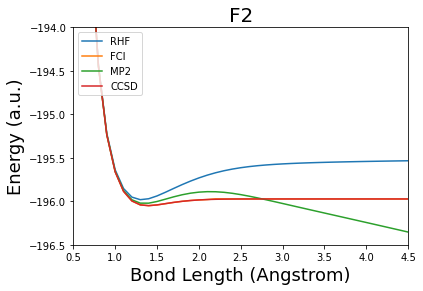

In [5]:
# plot RHF MP2 CCSD FCI
import matplotlib.pyplot as plt
plt.title("F2", fontsize=20)
plt.xlabel("Bond Length (Angstrom)", fontsize=18)
plt.ylabel("Energy (a.u.)", fontsize=18)
plt.plot(distance, energy_RHF, label = 'RHF')
plt.plot(distance, energy_FCI, label = 'FCI')
plt.plot(distance, energy_MP2, label = 'MP2')
plt.plot(distance, energy_CCSD, label = 'CCSD')
plt.legend(loc = 2)
plt.ylim(-196.5, -194)
plt.xlim(0.5, 4.5)
plt.show()

## UHF UCCSD

In [6]:
for i,R in enumerate(distance):
    mol.atom = [['F',(0.0, 0.0, 0.0)],['F',(0.0, 0.0, R)]]
    mol.basis = 'sto3g' 
    mol.build()
        
    print(mol.spheric_labels())
    nb = mol.nao_nr()
    print("nb = ",nb)
    dm = np.zeros((2,nb,nb)) 
    # F1
    dm[:,0,0] = 1 # 1s^2
    dm[:,1,1] = 1 # 2s^2
    dm[:,2,2] = 1 # 2px alpha
    dm[:,3,3] = 1
    dm[1,4,4] = 1
    # F2
    dm[:,5,5] = 1 # 1s
    dm[:,6,6] = 1 # 2s
    dm[:,7,7] = 1 # 2px beta
    dm[:,8,8] = 1
    dm[0,9,9] = 1
    molUHF = scf.UHF(mol)
    energy_UHF[i] = molUHF.kernel(dm0=dm,max_cycle=500)
    
    molUCCSD = cc.UCCSD(molUHF)
    #    molUCCSD.conv_tol = 1e-6
    #    molUCCSD.max_cycle = 1000
    #    molUCCSD.diis_space = 10
    if i==0:
        e,t1,t2 = molUCCSD.kernel()
    else:
        e,t1,t2 = molUCCSD.kernel(t1,t2)
    energy_UCCSD[i] = e + energy_UHF[i]
    print("R=",R) 
    #    assert molUCCSD.converged == True




['0 F 1s    ', '0 F 2s    ', '0 F 2px   ', '0 F 2py   ', '0 F 2pz   ', '1 F 1s    ', '1 F 2s    ', '1 F 2px   ', '1 F 2py   ', '1 F 2pz   ']
nb =  10


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpnn5yirpm
max_memory 4000 MB (current use 260 MB)
number electrons alpha = 9  beta = 9
Set gradient conv threshold to 3.16228e-05
E1 = -614.3354137318242  Ecoul = 164.00334643730142
init E= -21.6985264493229
cond(S) = 1595.0182906255025
    CPU time for initialize scf      7.06 sec, wall time      0.10 sec
  alpha nocc = 9  HOMO = 1.76048442006517  LUMO = 12.4506002563393
  beta  nocc = 9  HOMO = 1.76048442006517  LUMO = 12.4506002563393
  alpha mo_energy =
[-61.81024755 -19.75405

multiplicity <S^2> = 1.7171533e-06  2S+1 = 1.0000034
E1 = -487.13984428340075  Ecoul = 166.29683238916715
cycle= 2 E= -106.526241471634  delta_E= -0.00366  |g|= 0.0127  |ddm|= 0.458
    CPU time for cycle= 2      2.96 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = 0.781050194582445  LUMO = 9.56754432557796
  beta  nocc = 9  HOMO = 0.781050194582443  LUMO = 9.5675443255776
  alpha mo_energy =
[-40.44109344 -28.65950262  -3.32733704  -2.88893507  -2.88893507
  -1.33310275   0.70504121   0.78105019   0.78105019   9.56754433]
  beta  mo_energy =
[-40.44109344 -28.65950262  -3.32733704  -2.88893507  -2.88893507
  -1.33310275   0.70504121   0.78105019   0.78105019   9.56754433]
multiplicity <S^2> = 1.6428023e-08  2S+1 = 1
E1 = -487.14146734554834  Ecoul = 166.29844567987493
cycle= 3 E= -106.526251243073  delta_E= -9.77e-06  |g|= 0.00075  |ddm|= 0.0492
    CPU time for cycle= 3      2.93 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = 0.781014889541314  LUMO = 9.56749121315904
  

  beta  mo_energy =
[-32.19771202 -28.70366627  -2.83784463  -2.47264635  -2.47264635
  -1.22438998  -0.53198139   0.49460715   0.49460715  10.44497913]
multiplicity <S^2> = -3.5527137e-15  2S+1 = 1
E1 = -456.63520295608635  Ecoul = 158.86592888764835
cycle= 5 E= -154.891427120038  delta_E= -8.19e-12  |g|= 6.67e-08  |ddm|= 3.19e-05
    CPU time for cycle= 5      0.67 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = 0.494607152480079  LUMO = 10.4449791259989
  beta  nocc = 9  HOMO = 0.494607152480072  LUMO = 10.4449791259988
  alpha mo_energy =
[-32.197712   -28.70366624  -2.83784462  -2.47264634  -2.47264634
  -1.22438997  -0.53198138   0.49460715   0.49460715  10.44497913]
  beta  mo_energy =
[-32.197712   -28.70366624  -2.83784462  -2.47264634  -2.47264634
  -1.22438997  -0.53198138   0.49460715   0.49460715  10.44497913]
multiplicity <S^2> = -1.7763568e-15  2S+1 = 1
E1 = -456.6352029657089  Ecoul = 158.86592889727092
Extra cycle  E= -154.891427120038  delta_E=    0  |g|= 6.62e-

    CPU time for CCSD iter      5.22 sec, wall time      0.09 sec
cycle = 4  E_corr(CCSD) = -0.00204871026865002  dE = 7.6536966e-08  norm(t1,t2) = 1.2849e-06
    CPU time for CCSD iter      6.50 sec, wall time      0.11 sec
cycle = 5  E_corr(CCSD) = -0.00204870917085692  dE = 1.0977931e-09  norm(t1,t2) = 2.07156e-08
    CPU time for CCSD iter      2.22 sec, wall time      0.05 sec
    CPU time for CCSD     23.21 sec, wall time      0.40 sec
UCCSD converged
E(UCCSD) = -175.2292321328279  E_corr = -0.00204870917085692
R= 0.4
['0 F 1s    ', '0 F 2s    ', '0 F 2px   ', '0 F 2py   ', '0 F 2pz   ', '1 F 1s    ', '1 F 2s    ', '1 F 2px   ', '1 F 2py   ', '1 F 2pz   ']
nb =  10


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to sav

E1 = -400.400454576592  Ecoul = 138.70925681687345
cycle= 1 E= -190.252274285519  delta_E= 16.8  |g|= 0.23  |ddm|= 2.72
    CPU time for cycle= 1      0.64 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.0627550938548911  LUMO = 3.5520396162522
  beta  nocc = 9  HOMO = -0.0627550938548918  LUMO = 3.55203961625221
  alpha mo_energy =
[-26.70885429 -26.64463808  -2.96770851  -1.49023704  -1.49023704
  -1.10401978  -0.96536389  -0.06275509  -0.06275509   3.55203962]
  beta  mo_energy =
[-26.70885429 -26.64463808  -2.96770851  -1.49023704  -1.49023704
  -1.10401978  -0.96536389  -0.06275509  -0.06275509   3.55203962]
multiplicity <S^2> = 0.00025503845  2S+1 = 1.0005099
E1 = -400.40608540855794  Ecoul = 138.70159908577443
cycle= 2 E= -190.265562848583  delta_E= -0.0133  |g|= 0.0441  |ddm|= 0.43
    CPU time for cycle= 2      1.40 sec, wall time      0.02 sec
  alpha nocc = 9  HOMO = -0.0647062514849673  LUMO = 3.55281090681854
  beta  nocc = 9  HOMO = -0.0647062514849693  LUMO = 3.

  beta  mo_energy =
[-26.40217539 -26.38672319  -2.72755827  -1.26411775  -1.26411775
  -1.12147221  -0.89828364  -0.17110307  -0.17110307   2.52283187]
multiplicity <S^2> = 9.4067865e-07  2S+1 = 1.0000019
E1 = -387.61659734183246  Ecoul = 133.40278207252976
cycle= 3 E= -192.980452291417  delta_E= -0.00171  |g|= 0.00329  |ddm|= 0.138
    CPU time for cycle= 3      1.12 sec, wall time      0.02 sec
  alpha nocc = 9  HOMO = -0.170894108668075  LUMO = 2.52180004493292
  beta  nocc = 9  HOMO = -0.170894108668073  LUMO = 2.52180004493292
  alpha mo_energy =
[-26.40194111 -26.38649825  -2.72777458  -1.26429121  -1.26429121
  -1.12081769  -0.89786252  -0.17089411  -0.17089411   2.52180004]
  beta  mo_energy =
[-26.40194111 -26.38649825  -2.72777458  -1.26429121  -1.26429121
  -1.12081769  -0.89786252  -0.17089411  -0.17089411   2.52180004]
multiplicity <S^2> = 2.2498607e-09  2S+1 = 1
E1 = -387.61563688342204  Ecoul = 133.40181824052928
cycle= 4 E= -192.980455665007  delta_E= -3.37e-06  |g|= 0

E1 = -376.76960233822774  Ecoul = 128.7545403319497
cycle= 4 E= -194.435869400628  delta_E= -8.61e-06  |g|= 0.000262  |ddm|= 0.0085
    CPU time for cycle= 4      0.72 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.253330617812325  LUMO = 1.84002429244943
  beta  nocc = 9  HOMO = -0.253330617812327  LUMO = 1.84002429244943
  alpha mo_energy =
[-26.24518905 -26.24217617  -2.47332822  -1.1498844   -1.08605883
  -1.08605883  -0.84097586  -0.25333062  -0.25333062   1.84002429]
  beta  mo_energy =
[-26.24518905 -26.24217617  -2.47332822  -1.1498844   -1.08605883
  -1.08605883  -0.84097586  -0.25333062  -0.25333062   1.84002429]
multiplicity <S^2> = 1.5460166e-10  2S+1 = 1
E1 = -376.7694873853236  Ecoul = 128.75442534399957
cycle= 5 E= -194.435869435674  delta_E= -3.5e-08  |g|= 1.9e-05  |ddm|= 0.000545
    CPU time for cycle= 5      1.04 sec, wall time      0.02 sec
  alpha nocc = 9  HOMO = -0.253329688069414  LUMO = 1.84002502283638
  beta  nocc = 9  HOMO = -0.253329688069415  LUM

  alpha mo_energy =
[-26.1614868  -26.16134861  -2.24374818  -1.18675211  -0.94675614
  -0.94675614  -0.79002058  -0.3169382   -0.3169382    1.36245941]
  beta  mo_energy =
[-26.1614868  -26.16134861  -2.24374818  -1.18675211  -0.94675614
  -0.94675614  -0.79002058  -0.3169382   -0.3169382    1.36245941]
multiplicity <S^2> = 2.5199398e-11  2S+1 = 1
E1 = -367.5492098377248  Ecoul = 124.70385209512638
cycle= 6 E= -195.219408759798  delta_E= -2.35e-10  |g|= 4.55e-06  |ddm|= 2.83e-05
    CPU time for cycle= 6      3.05 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.316938657920659  LUMO = 1.36246133671537
  beta  nocc = 9  HOMO = -0.316938657920659  LUMO = 1.36246133671537
  alpha mo_energy =
[-26.16148801 -26.16134982  -2.24374911  -1.18675292  -0.94675661
  -0.94675661  -0.79002243  -0.31693866  -0.31693866   1.36246134]
  beta  mo_energy =
[-26.16148801 -26.16134982  -2.24374911  -1.18675292  -0.94675661
  -0.94675661  -0.79002243  -0.31693866  -0.31693866   1.36246134]
multip

  alpha mo_energy =
[-26.11433659 -26.11333956  -2.05303562  -1.22576083  -0.83921429
  -0.83921429  -0.74210662  -0.36563393  -0.36563393   1.02258152]
  beta  mo_energy =
[-26.11433659 -26.11333956  -2.05303562  -1.22576083  -0.83921429
  -0.83921429  -0.74210662  -0.36563393  -0.36563393   1.02258152]
multiplicity <S^2> = 1.6342483e-13  2S+1 = 1
E1 = -359.68623307121504  Ecoul = 121.18483752805005
cycle= 7 E= -195.638041458645  delta_E= -3.02e-11  |g|= 3.34e-07  |ddm|= 1.36e-05
    CPU time for cycle= 7      2.97 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.36563410775672  LUMO = 1.02258227188092
  beta  nocc = 9  HOMO = -0.36563410775672  LUMO = 1.02258227188091
  alpha mo_energy =
[-26.11433711 -26.11334008  -2.05303607  -1.22576103  -0.8392145
  -0.8392145   -0.74210749  -0.36563411  -0.36563411   1.02258227]
  beta  mo_energy =
[-26.11433711 -26.11334008  -2.05303607  -1.22576103  -0.8392145
  -0.8392145   -0.74210749  -0.36563411  -0.36563411   1.02258227]
multiplic

  alpha mo_energy =
[-26.08467951 -26.0834738   -1.90158625  -1.26277796  -0.75692444
  -0.75692444  -0.69557136  -0.40267381  -0.40267381   0.77783612]
  beta  mo_energy =
[-26.08467951 -26.0834738   -1.90158625  -1.26277796  -0.75692444
  -0.75692444  -0.69557136  -0.40267381  -0.40267381   0.77783612]
multiplicity <S^2> = 1.0835777e-13  2S+1 = 1
E1 = -352.9457435806097  Ecoul = 118.12558876905987
cycle= 7 E= -195.853469280168  delta_E= -5.93e-11  |g|= 2.33e-07  |ddm|= 2.2e-05
    CPU time for cycle= 7      3.00 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.402673682541398  LUMO = 0.777835560004085
  beta  nocc = 9  HOMO = -0.402673682541395  LUMO = 0.77783556000409
  alpha mo_energy =
[-26.08467915 -26.08347344  -1.90158595  -1.26277784  -0.75692429
  -0.75692429  -0.69557068  -0.40267368  -0.40267368   0.77783556]
  beta  mo_energy =
[-26.08467915 -26.08347344  -1.90158595  -1.26277784  -0.75692429
  -0.75692429  -0.69557068  -0.40267368  -0.40267368   0.77783556]
multip

  alpha mo_energy =
[-26.06448981 -26.06331107  -1.78453482  -1.29552003  -0.6944035
  -0.6944035   -0.64929018  -0.43073645  -0.43073645   0.59801967]
  beta  mo_energy =
[-26.06448981 -26.06331107  -1.78453482  -1.29552003  -0.6944035
  -0.6944035   -0.64929018  -0.43073645  -0.43073645   0.59801967]
multiplicity <S^2> = 3.6219916e-12  2S+1 = 1
E1 = -347.1278620170865  Ecoul = 115.4565270933058
cycle= 7 E= -195.951873186681  delta_E= -2.49e-08  |g|= 2.79e-06  |ddm|= 0.000534
    CPU time for cycle= 7      2.88 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.430734890065189  LUMO = 0.598013460448335
  beta  nocc = 9  HOMO = -0.430734890065191  LUMO = 0.598013460448334
  alpha mo_energy =
[-26.0644857  -26.06330695  -1.78453159  -1.29551863  -0.69440166
  -0.69440166  -0.64928202  -0.43073489  -0.43073489   0.59801346]
  beta  mo_energy =
[-26.0644857  -26.06330695  -1.78453159  -1.29551863  -0.69440166
  -0.69440166  -0.64928202  -0.43073489  -0.43073489   0.59801346]
multipl

  alpha mo_energy =
[-26.0517196  -26.04950719  -1.69684342  -1.32359414  -0.64783275
  -0.64783275  -0.60718572  -0.45242108  -0.45242108   0.4662186 ]
  beta  mo_energy =
[-26.0517196  -26.04950719  -1.69684342  -1.32359414  -0.64783275
  -0.64783275  -0.60718572  -0.45242108  -0.45242108   0.4662186 ]
multiplicity <S^2> = 0.0042165216  2S+1 = 1.0083978
E1 = -342.0696455757612  Ecoul = 113.11678240374414
cycle= 6 E= -195.981052337771  delta_E= -0.00228  |g|= 0.00402  |ddm|= 0.199
    CPU time for cycle= 6      3.04 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.451942197555624  LUMO = 0.46287233006459
  beta  nocc = 9  HOMO = -0.451942197555646  LUMO = 0.462872330064565
  alpha mo_energy =
[-26.04989316 -26.04879734  -1.69576792  -1.32319959  -0.6472552
  -0.6472552   -0.60329512  -0.4519422   -0.4519422    0.46287233]
  beta  mo_energy =
[-26.04989316 -26.04879734  -1.69576792  -1.32319959  -0.6472552
  -0.6472552   -0.60329512  -0.4519422   -0.4519422    0.46287233]
multi

init E= -202.786226534338
cond(S) = 2.291624789169645
    CPU time for initialize scf      6.58 sec, wall time      0.09 sec
  alpha nocc = 9  HOMO = -0.390787898027021  LUMO = 0.526569963331774
  beta  nocc = 9  HOMO = -0.390787898027022  LUMO = 0.526569963331778
  alpha mo_energy =
[-26.05223617 -26.02221806  -1.57165352  -1.19919325  -0.58290413
  -0.58290413  -0.57716048  -0.3907879   -0.3907879    0.52656996]
  beta  mo_energy =
[-26.05223617 -26.02221806  -1.57165352  -1.19919325  -0.58290413
  -0.58290413  -0.57716048  -0.3907879   -0.3907879    0.52656996]
multiplicity <S^2> = 0.70962182  2S+1 = 1.9592058
E1 = -337.8486780957172  Ecoul = 111.28770934019147
cycle= 1 E= -195.944287266583  delta_E= 6.84  |g|= 0.118  |ddm|= 0.951
    CPU time for cycle= 1      0.92 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.446990583068299  LUMO = 0.467493441711767
  beta  nocc = 9  HOMO = -0.446990583068298  LUMO = 0.467493441711772
  alpha mo_energy =
[-26.00593901 -25.98212753  -1.

cycle = 5  E_corr(CCSD) = -0.0745694867273567  dE = -0.000446544001  norm(t1,t2) = 0.00317016
    CPU time for CCSD iter      1.57 sec, wall time      0.03 sec
cycle = 6  E_corr(CCSD) = -0.0746818915203653  dE = -0.000112404793  norm(t1,t2) = 0.000593341
    CPU time for CCSD iter      6.75 sec, wall time      0.11 sec
cycle = 7  E_corr(CCSD) = -0.0746996858846087  dE = -1.77943642e-05  norm(t1,t2) = 0.000194269
    CPU time for CCSD iter      6.74 sec, wall time      0.11 sec
cycle = 8  E_corr(CCSD) = -0.0747094703256099  dE = -9.784441e-06  norm(t1,t2) = 0.000104233
    CPU time for CCSD iter      5.76 sec, wall time      0.10 sec
cycle = 9  E_corr(CCSD) = -0.0747019208196246  dE = 7.54950599e-06  norm(t1,t2) = 3.05454e-05
    CPU time for CCSD iter      6.61 sec, wall time      0.11 sec
cycle = 10  E_corr(CCSD) = -0.0746995804902891  dE = 2.34032934e-06  norm(t1,t2) = 7.27124e-06
    CPU time for CCSD iter      6.72 sec, wall time      0.11 sec
cycle = 11  E_corr(CCSD) = -0.07469983

  beta  mo_energy =
[-26.01173583 -25.99030461  -1.58032824  -1.33717988  -0.60530646
  -0.57597018  -0.57597018  -0.46461378  -0.46461378   0.38814611]
multiplicity <S^2> = 0.56436657  2S+1 = 1.8048452
E1 = -333.8844129747083  Ecoul = 109.33618354475928
Extra cycle  E= -195.972660040269  delta_E= 1.99e-13  |g|= 1.54e-08  |ddm|= 3.53e-08
    CPU time for scf_cycle     31.55 sec, wall time      0.46 sec
    CPU time for SCF     31.64 sec, wall time      0.47 sec
converged SCF energy = -195.972660040269  <S^2> = 0.56436657  2S+1 = 1.8048452

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 9), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 261 MB)
E1 = -333.8844129747083  Ecoul = 109.33618354475928
Init E_corr(CCSD) = 0.00202724739975771
cycle = 1  E_corr(CCSD) = -0.01119560556145  dE = -0.013222853  norm(t1,t2) = 0.19023
    CPU tim

cycle= 4 E= -195.972841639193  delta_E= -8.57e-05  |g|= 0.000506  |ddm|= 0.0193
    CPU time for cycle= 4      0.74 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.467640247369838  LUMO = 0.379236625513016
  beta  nocc = 9  HOMO = -0.467640247369839  LUMO = 0.379236625513011
  alpha mo_energy =
[-25.99955784 -25.9746553   -1.55348534  -1.33539667  -0.61611794
  -0.55599683  -0.55599683  -0.46764025  -0.46764025   0.37923663]
  beta  mo_energy =
[-25.99955784 -25.9746553   -1.55348534  -1.33539667  -0.61611794
  -0.55599683  -0.55599683  -0.46764025  -0.46764025   0.37923663]
multiplicity <S^2> = 0.74455296  2S+1 = 1.9945455
E1 = -330.47169872156746  Ecoul = 107.70926043033974
cycle= 5 E= -195.972841988403  delta_E= -3.49e-07  |g|= 9.02e-05  |ddm|= 0.00143
    CPU time for cycle= 5      0.77 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.467631138907903  LUMO = 0.379387951019766
  beta  nocc = 9  HOMO = -0.467631138907905  LUMO = 0.379387951019769
  alpha mo_energy =


  beta  mo_energy =
[-25.98757158 -25.95970015  -1.53829122  -1.32773366  -0.63236062
  -0.54168878  -0.54168878  -0.46694989  -0.46694989   0.3853098 ]
multiplicity <S^2> = 0.87933923  2S+1 = 2.1254075
E1 = -327.43293178278867  Ecoul = 106.24626095808031
cycle= 2 E= -195.972933127932  delta_E= -0.00262  |g|= 0.0181  |ddm|= 0.0622
    CPU time for cycle= 2      1.05 sec, wall time      0.02 sec
  alpha nocc = 9  HOMO = -0.469045662304016  LUMO = 0.376396871926713
  beta  nocc = 9  HOMO = -0.469045662304013  LUMO = 0.376396871926711
  alpha mo_energy =
[-25.99107288 -25.96399071  -1.5381114   -1.33152257  -0.62534814
  -0.54282051  -0.54282051  -0.46904566  -0.46904566   0.37639687]
  beta  mo_energy =
[-25.99107288 -25.96399071  -1.5381114   -1.33152257  -0.62534814
  -0.54282051  -0.54282051  -0.46904566  -0.46904566   0.37639687]
multiplicity <S^2> = 0.85497511  2S+1 = 2.1023559
E1 = -327.424068707846  Ecoul = 106.23685570934903
cycle= 3 E= -195.973475301721  delta_E= -0.000542  |g|=

    CPU time for CCSD iter      6.65 sec, wall time      0.11 sec
    CPU time for CCSD    129.16 sec, wall time      2.09 sec
UCCSD converged
E(UCCSD) = -196.0123206379309  E_corr = -0.03882563737698216
R= 1.7000000000000002
['0 F 1s    ', '0 F 2s    ', '0 F 2px   ', '0 F 2py   ', '0 F 2pz   ', '1 F 1s    ', '1 F 2s    ', '1 F 2px   ', '1 F 2py   ', '1 F 2pz   ']
nb =  10


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpuvywl358
max_memory 4000 MB (current use 261 MB)
number electrons alpha = 9  beta = 9
Set gradient conv threshold to 3.16228e-05
E1 = -331.53503648172205  Ecoul = 105.05430882018746
init E= -202.667753170135
cond(S) = 1.7199084538947107
    CPU time for init

    CPU time for CCSD iter      6.70 sec, wall time      0.11 sec
cycle = 13  E_corr(CCSD) = -0.0262152697454875  dE = -6.83604972e-06  norm(t1,t2) = 4.59347e-05
    CPU time for CCSD iter      6.76 sec, wall time      0.11 sec
cycle = 14  E_corr(CCSD) = -0.0262130724444887  dE = 2.197301e-06  norm(t1,t2) = 2.06655e-05
    CPU time for CCSD iter      6.79 sec, wall time      0.11 sec
cycle = 15  E_corr(CCSD) = -0.0262113565602286  dE = 1.71588426e-06  norm(t1,t2) = 1.2876e-05
    CPU time for CCSD iter      6.83 sec, wall time      0.11 sec
cycle = 16  E_corr(CCSD) = -0.0262102582655032  dE = 1.09829473e-06  norm(t1,t2) = 9.85303e-06
    CPU time for CCSD iter      6.48 sec, wall time      0.11 sec
cycle = 17  E_corr(CCSD) = -0.0262088646950204  dE = 1.39357048e-06  norm(t1,t2) = 7.81334e-06
    CPU time for CCSD iter      6.64 sec, wall time      0.11 sec
cycle = 18  E_corr(CCSD) = -0.0262090977002038  dE = -2.33005183e-07  norm(t1,t2) = 5.17097e-06
    CPU time for CCSD iter      6.9

    CPU time for scf_cycle     14.47 sec, wall time      0.22 sec
    CPU time for SCF     14.51 sec, wall time      0.23 sec
converged SCF energy = -195.973896447311  <S^2> = 0.94749222  2S+1 = 2.1885998

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 9), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 261 MB)
E1 = -322.2266655769912  Ecoul = 103.69310908519589
Init E_corr(CCSD) = -0.0159477036026696
cycle = 1  E_corr(CCSD) = -0.0160690416734407  dE = -0.000121338071  norm(t1,t2) = 0.0593221
    CPU time for CCSD iter      5.26 sec, wall time      0.09 sec
cycle = 2  E_corr(CCSD) = -0.0159801062648141  dE = 8.89354086e-05  norm(t1,t2) = 0.017466
    CPU time for CCSD iter      2.80 sec, wall time      0.05 sec
cycle = 3  E_corr(CCSD) = -0.0159123024041745  dE = 6.78038606e-05  norm(t1,t2) = 0.0068877
    CPU time for CCSD iter   

  beta  mo_energy =
[-25.98077763 -25.95178462  -1.52064909  -1.32479105  -0.63078322
  -0.52672643  -0.52672643  -0.47021013  -0.47021013   0.36717511]
multiplicity <S^2> = 0.96992738  2S+1 = 2.2090065
E1 = -320.00507997510397  Ecoul = 102.59972965665452
cycle= 3 E= -195.973673276189  delta_E= -4.04e-05  |g|= 0.000628  |ddm|= 0.00965
    CPU time for cycle= 3      0.72 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.470276784271353  LUMO = 0.366852322555557
  beta  nocc = 9  HOMO = -0.470276784271353  LUMO = 0.366852322555558
  alpha mo_energy =
[-25.98086645 -25.95190152  -1.52061867  -1.32491055  -0.63052386
  -0.52675092  -0.52675092  -0.47027678  -0.47027678   0.36685232]
  beta  mo_energy =
[-25.98086645 -25.95190152  -1.52061867  -1.32491055  -0.63052386
  -0.52675092  -0.52675092  -0.47027678  -0.47027678   0.36685232]
multiplicity <S^2> = 0.96950898  2S+1 = 2.2086276
E1 = -320.0048948413883  Ecoul = 102.59954397706305
cycle= 4 E= -195.973673822065  delta_E= -5.46e-07 

chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpf30bd4ko
max_memory 4000 MB (current use 261 MB)
number electrons alpha = 9  beta = 9
Set gradient conv threshold to 3.16228e-05
E1 = -324.80971928752945  Ecoul = 101.73910619057668
init E= -202.659492104324
cond(S) = 1.6486830416685172
    CPU time for initialize scf      6.52 sec, wall time      0.09 sec
  alpha nocc = 9  HOMO = -0.444306175984852  LUMO = 0.3938192277394
  beta  nocc = 9  HOMO = -0.444306175984854  LUMO = 0.3938192277394
  alpha mo_energy =
[-26.03388725 -26.00349335  -1.42663119  -1.22969983  -0.60821325
  -0.50054584  -0.50054584  -0.44430618  -0.44430618   0.39381923]
  beta  mo_energy =
[-26.03388725 -26.00349335  -1.42663119  -1.22969983  -0.60821325
  -0.50054584  -0.50054584  -0.44430618  -0.44430618   0.39381923]
multiplicity <S^2> = 0.98858438  2S+1 = 2.2258341
E1 = -317.99087821221895  Ecoul = 101.60662110312327
cycle= 1 E= -195.973136116467  delta_E= 6.69  |g|= 0.0148  |ddm|= 0.74
    CPU time for

    CPU time for CCSD iter      6.62 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 21  E_corr(CCSD) = -0.00626262948190154  dE = -3.85031945e-09  norm(t1,t2) = 2.83892e-06
    CPU time for CCSD iter      2.19 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 22  E_corr(CCSD) = -0.00626231487269742  dE = 3.14609204e-07  norm(t1,t2) = 2.58163e-06
    CPU time for CCSD iter      2.29 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 23  E_corr(CCSD) = -0.00626217517155096  dE = 1.39701146e-07  norm(t1,t2) = 1.78298e-06
    CPU time for CCSD iter      1.62 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 24  E_corr(CCSD) = -0.00626210601816665  dE = 6.91533843e-08  norm(t1,t2) = 1.58873e-06
    CPU time for CCSD iter      5.99 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 25  E_corr(CCSD) = -0.00626208799865363  d

    CPU time for cycle= 5      1.33 sec, wall time      0.02 sec
  alpha nocc = 9  HOMO = -0.468892567049618  LUMO = 0.366947327034143
  beta  nocc = 9  HOMO = -0.468892567049622  LUMO = 0.366947327034148
  alpha mo_energy =
[-25.97752972 -25.94819828  -1.51704774  -1.32186229  -0.63049229
  -0.5232435   -0.5232435   -0.46889257  -0.46889257   0.36694733]
  beta  mo_energy =
[-25.97752972 -25.94819828  -1.51704774  -1.32186229  -0.63049229
  -0.5232435   -0.5232435   -0.46889257  -0.46889257   0.36694733]
multiplicity <S^2> = 0.99032259  2S+1 = 2.2273954
E1 = -316.1540667264715  Ecoul = 100.6976314962123
Extra cycle  E= -195.973092464568  delta_E= -4.86e-12  |g|= 9.46e-07  |ddm|= 2.17e-06
    CPU time for scf_cycle      7.11 sec, wall time      0.11 sec
    CPU time for SCF      7.15 sec, wall time      0.12 sec
converged SCF energy = -195.973092464568  <S^2> = 0.99032259  2S+1 = 2.2273954

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 9), nmo = (10, 10)
max_

multiplicity <S^2> = 0.99518954  2S+1 = 2.2317612
E1 = -314.4756589036024  Ecoul = 99.8665309026938
cycle= 2 E= -195.972887094596  delta_E= -5.94e-05  |g|= 0.00176  |ddm|= 0.00965
    CPU time for cycle= 2      1.12 sec, wall time      0.02 sec
  alpha nocc = 9  HOMO = -0.46821633787169  LUMO = 0.367435767723727
  beta  nocc = 9  HOMO = -0.468216337871691  LUMO = 0.367435767723727
  alpha mo_energy =
[-25.9764356  -25.9470237   -1.51601089  -1.32081395  -0.63009836
  -0.52224643  -0.52224643  -0.46821634  -0.46821634   0.36743577]
  beta  mo_energy =
[-25.9764356  -25.9470237   -1.51601089  -1.32081395  -0.63009836
  -0.52224643  -0.52224643  -0.46821634  -0.46821634   0.36743577]
multiplicity <S^2> = 0.99478116  2S+1 = 2.2313952
E1 = -314.47572341400775  Ecoul = 99.86659146627542
cycle= 3 E= -195.972891041419  delta_E= -3.95e-06  |g|= 0.00018  |ddm|= 0.00294
    CPU time for cycle= 3      0.74 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.468217498162764  LUMO = 0.367403270

cycle = 28  E_corr(CCSD) = -0.00207267932987326  dE = 6.90387498e-08  norm(t1,t2) = 1.82284e-06
    CPU time for CCSD iter      6.54 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 29  E_corr(CCSD) = -0.00207255755436614  dE = 1.21775507e-07  norm(t1,t2) = 1.71604e-06
    CPU time for CCSD iter      6.70 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 30  E_corr(CCSD) = -0.00207228568051325  dE = 2.71873853e-07  norm(t1,t2) = 1.56898e-06
    CPU time for CCSD iter      6.77 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 31  E_corr(CCSD) = -0.00207210694314208  dE = 1.78737371e-07  norm(t1,t2) = 1.30322e-06
    CPU time for CCSD iter      4.71 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 32  E_corr(CCSD) = -0.00207208396631492  dE = 2.29768272e-08  norm(t1,t2) = 1.2034e-06
    CPU time for CCSD iter      6.57 sec, wall time      0.11 sec
Lin

multiplicity <S^2> = 0.99721416  2S+1 = 2.2335749
E1 = -312.93561661829017  Ecoul = 99.10311549943286
cycle= 4 E= -195.972770250307  delta_E= -2.05e-08  |g|= 3.08e-05  |ddm|= 0.000206
    CPU time for cycle= 4      0.77 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.46761424262829  LUMO = 0.367939755401871
  beta  nocc = 9  HOMO = -0.467614242628293  LUMO = 0.367939755401864
  alpha mo_energy =
[-25.97559119 -25.94613963  -1.51519927  -1.31999967  -0.62953999
  -0.52149192  -0.52149192  -0.46761424  -0.46761424   0.36793976]
  beta  mo_energy =
[-25.97559119 -25.94613963  -1.51519927  -1.31999967  -0.62953999
  -0.52149192  -0.52149192  -0.46761424  -0.46761424   0.36793976]
multiplicity <S^2> = 0.99721509  2S+1 = 2.2335757
E1 = -312.9356383862263  Ecoul = 99.10313726640592
cycle= 5 E= -195.97277025127  delta_E= -9.63e-10  |g|= 5.14e-07  |ddm|= 4.7e-05
    CPU time for cycle= 5      0.89 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.467614220809338  LUMO = 0.367939

Linear dependence found in DIIS error vectors.
cycle = 35  E_corr(CCSD) = -0.00117644247159727  dE = -6.79107369e-08  norm(t1,t2) = 3.24593e-06
    CPU time for CCSD iter      6.72 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 36  E_corr(CCSD) = -0.00117653848949537  dE = -9.60178981e-08  norm(t1,t2) = 3.19699e-06
    CPU time for CCSD iter      4.59 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 37  E_corr(CCSD) = -0.00117669175862852  dE = -1.53269133e-07  norm(t1,t2) = 3.12583e-06
    CPU time for CCSD iter      1.96 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 38  E_corr(CCSD) = -0.0011767218385517  dE = -3.00799232e-08  norm(t1,t2) = 3.08008e-06
    CPU time for CCSD iter      1.66 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 39  E_corr(CCSD) = -0.00117672629424633  dE = -4.45569463e-09  norm(t1,t2) = 3.06952e-06
    CPU time for 

multiplicity <S^2> = 0.99856169  2S+1 = 2.2347811
E1 = -311.51744839823846  Ecoul = 98.39939271176445
Extra cycle  E= -195.972714052666  delta_E= 2.84e-14  |g|= 3.27e-08  |ddm|= 2.17e-07
    CPU time for scf_cycle     11.83 sec, wall time      0.18 sec
    CPU time for SCF     11.89 sec, wall time      0.19 sec
converged SCF energy = -195.972714052666  <S^2> = 0.99856169  2S+1 = 2.2347811

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 9), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 261 MB)
E1 = -311.51744839823846  Ecoul = 98.39939271176443
Init E_corr(CCSD) = -0.000585770817371867
cycle = 1  E_corr(CCSD) = -0.000586559181260596  dE = -7.88363889e-07  norm(t1,t2) = 0.0174696
    CPU time for CCSD iter      3.00 sec, wall time      0.06 sec
cycle = 2  E_corr(CCSD) = -0.000579838798349028  dE = 6.72038291e-06  norm(t1,t2) = 0.0

Linear dependence found in DIIS error vectors.
cycle = 40  E_corr(CCSD) = -0.000687993660224525  dE = -1.60163557e-08  norm(t1,t2) = 3.77008e-06
    CPU time for CCSD iter      6.66 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 41  E_corr(CCSD) = -0.000688019254577086  dE = -2.55943526e-08  norm(t1,t2) = 3.76843e-06
    CPU time for CCSD iter      6.65 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 42  E_corr(CCSD) = -0.000688046617164679  dE = -2.73625876e-08  norm(t1,t2) = 3.76608e-06
    CPU time for CCSD iter      2.22 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 43  E_corr(CCSD) = -0.000688069524860502  dE = -2.29076958e-08  norm(t1,t2) = 3.76338e-06
    CPU time for CCSD iter      6.05 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 44  E_corr(CCSD) = -0.000688089019746379  dE = -1.94948859e-08  norm(t1,t2) = 3.76103e-06
    CPU tim

    CPU time for CCSD iter      6.32 sec, wall time      0.10 sec
cycle = 3  E_corr(CCSD) = -0.000297718746194043  dE = 1.39381999e-06  norm(t1,t2) = 0.00136094
    CPU time for CCSD iter      6.14 sec, wall time      0.10 sec
cycle = 4  E_corr(CCSD) = -0.000297844171759521  dE = -1.25425565e-07  norm(t1,t2) = 0.000466245
    CPU time for CCSD iter      6.67 sec, wall time      0.11 sec
cycle = 5  E_corr(CCSD) = -0.000298083985558146  dE = -2.39813799e-07  norm(t1,t2) = 0.000273842
    CPU time for CCSD iter      6.80 sec, wall time      0.11 sec
cycle = 6  E_corr(CCSD) = -0.000298185616268685  dE = -1.01630711e-07  norm(t1,t2) = 0.000269347
    CPU time for CCSD iter      6.37 sec, wall time      0.11 sec
cycle = 7  E_corr(CCSD) = -0.000298457094700693  dE = -2.71478432e-07  norm(t1,t2) = 0.000269136
    CPU time for CCSD iter      6.78 sec, wall time      0.11 sec
cycle = 8  E_corr(CCSD) = -0.000300000330362732  dE = -1.54323566e-06  norm(t1,t2) = 0.000268817
    CPU time for CCSD it

    CPU time for CCSD iter      6.57 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 48  E_corr(CCSD) = -0.000445070567543679  dE = -4.5857761e-08  norm(t1,t2) = 5.7479e-06
    CPU time for CCSD iter      6.28 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 49  E_corr(CCSD) = -0.000445118211184144  dE = -4.76436405e-08  norm(t1,t2) = 5.72466e-06
    CPU time for CCSD iter      6.40 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 50  E_corr(CCSD) = -0.000445219610438387  dE = -1.01399254e-07  norm(t1,t2) = 5.63117e-06
    CPU time for CCSD iter      6.78 sec, wall time      0.11 sec
    CPU time for CCSD    309.53 sec, wall time      5.05 sec
UCCSD not converged
E(UCCSD) = -195.9731467718657  E_corr = -0.0004452196104383866
R= 2.6
['0 F 1s    ', '0 F 2s    ', '0 F 2px   ', '0 F 2py   ', '0 F 2pz   ', '1 F 1s    ', '1 F 2s    ', '1 F 2px   ', '1 F 2py   ', '1 F 2pz   ']
nb =  10




    CPU time for CCSD iter      6.42 sec, wall time      0.11 sec
cycle = 13  E_corr(CCSD) = -0.000291264361895011  dE = 2.14866359e-05  norm(t1,t2) = 9.06813e-05
    CPU time for CCSD iter      6.60 sec, wall time      0.11 sec
cycle = 14  E_corr(CCSD) = -0.00017466003956957  dE = 0.000116604322  norm(t1,t2) = 0.000106741
    CPU time for CCSD iter      6.69 sec, wall time      0.11 sec
cycle = 15  E_corr(CCSD) = -0.000160561898287825  dE = 1.40981413e-05  norm(t1,t2) = 0.000198546
    CPU time for CCSD iter      6.69 sec, wall time      0.11 sec
cycle = 16  E_corr(CCSD) = -0.000181885966327557  dE = -2.1324068e-05  norm(t1,t2) = 0.000205854
    CPU time for CCSD iter      6.79 sec, wall time      0.11 sec
cycle = 17  E_corr(CCSD) = -0.000214663060603493  dE = -3.27770943e-05  norm(t1,t2) = 0.00019452
    CPU time for CCSD iter      6.59 sec, wall time      0.11 sec
cycle = 18  E_corr(CCSD) = -0.00020839861383786  dE = 6.26444677e-06  norm(t1,t2) = 0.000170508
    CPU time for CCSD it

  beta  mo_energy =
[-26.02960068 -25.99920766  -1.42035738  -1.22597047  -0.60353772
  -0.49553284  -0.49553284  -0.44175395  -0.44175395   0.39402818]
multiplicity <S^2> = 0.99987798  2S+1 = 2.2359588
E1 = -307.86588239833395  Ecoul = 96.58480316783618
cycle= 1 E= -195.972738486026  delta_E= 6.69  |g|= 0.00145  |ddm|= 0.734
    CPU time for cycle= 1      2.99 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.465960811891435  LUMO = 0.369808069663078
  beta  nocc = 9  HOMO = -0.465960811891432  LUMO = 0.369808069663078
  alpha mo_energy =
[-25.9736003  -25.94410317  -1.51329435  -1.31802903  -0.62772135
  -0.51973449  -0.51973449  -0.46596081  -0.46596081   0.36980807]
  beta  mo_energy =
[-25.9736003  -25.94410317  -1.51329435  -1.31802903  -0.62772135
  -0.51973449  -0.51973449  -0.46596081  -0.46596081   0.36980807]
multiplicity <S^2> = 0.99983986  2S+1 = 2.2359247
E1 = -307.86604159432295  Ecoul = 96.58496051677432
cycle= 2 E= -195.972740333077  delta_E= -1.85e-06  |g|= 0.0

cycle = 23  E_corr(CCSD) = -0.000265183563747773  dE = -6.59740264e-07  norm(t1,t2) = 4.51606e-05
    CPU time for CCSD iter      2.03 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 24  E_corr(CCSD) = -0.00026635230650706  dE = -1.16874276e-06  norm(t1,t2) = 4.49021e-05
    CPU time for CCSD iter      1.68 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 25  E_corr(CCSD) = -0.00026766676069052  dE = -1.31445418e-06  norm(t1,t2) = 4.45216e-05
    CPU time for CCSD iter      6.59 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 26  E_corr(CCSD) = -0.000271019944802687  dE = -3.35318411e-06  norm(t1,t2) = 4.41363e-05
    CPU time for CCSD iter      2.16 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 27  E_corr(CCSD) = -0.000275715795607317  dE = -4.6958508e-06  norm(t1,t2) = 4.03748e-05
    CPU time for CCSD iter      6.29 sec, wall time      0.10

E1 = -306.81590488101847  Ecoul = 96.06266717467507
cycle= 3 E= -195.972770780647  delta_E= -6.53e-08  |g|= 6.06e-05  |ddm|= 0.000334
    CPU time for cycle= 3      2.97 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.465664348110528  LUMO = 0.37016023420613
  beta  nocc = 9  HOMO = -0.465664348110531  LUMO = 0.370160234206126
  alpha mo_energy =
[-25.97327491 -25.94377695  -1.51296878  -1.31770464  -0.62735156
  -0.5194353   -0.5194353   -0.46566435  -0.46566435   0.37016023]
  beta  mo_energy =
[-25.97327491 -25.94377695  -1.51296878  -1.31770464  -0.62735156
  -0.5194353   -0.5194353   -0.46566435  -0.46566435   0.37016023]
multiplicity <S^2> = 0.99992052  2S+1 = 2.2359969
E1 = -306.8159297338229  Ecoul = 96.06269202388685
cycle= 4 E= -195.972770784239  delta_E= -3.59e-09  |g|= 1.04e-05  |ddm|= 7.87e-05
    CPU time for cycle= 4      2.97 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.465663705427778  LUMO = 0.370161046539139
  beta  nocc = 9  HOMO = -0.4656637054

    CPU time for CCSD iter      6.83 sec, wall time      0.11 sec
cycle = 33  E_corr(CCSD) = -0.000207384813462305  dE = -2.11272495e-05  norm(t1,t2) = 8.41475e-05
    CPU time for CCSD iter      6.75 sec, wall time      0.11 sec
cycle = 34  E_corr(CCSD) = -0.00020656923432104  dE = 8.15579141e-07  norm(t1,t2) = 7.21831e-05
    CPU time for CCSD iter      6.80 sec, wall time      0.11 sec
cycle = 35  E_corr(CCSD) = -0.000225621416284733  dE = -1.9052182e-05  norm(t1,t2) = 4.71942e-05
    CPU time for CCSD iter      6.75 sec, wall time      0.11 sec
cycle = 36  E_corr(CCSD) = -0.000232460397143989  dE = -6.83898086e-06  norm(t1,t2) = 2.66104e-05
    CPU time for CCSD iter      6.76 sec, wall time      0.11 sec
cycle = 37  E_corr(CCSD) = -0.000237791276735175  dE = -5.33087959e-06  norm(t1,t2) = 6.98405e-05
    CPU time for CCSD iter      6.82 sec, wall time      0.11 sec
cycle = 38  E_corr(CCSD) = -0.000235825705745194  dE = 1.96557099e-06  norm(t1,t2) = 6.54417e-05
    CPU time for CCS

    CPU time for SCF     13.11 sec, wall time      0.20 sec
converged SCF energy = -195.972801064972  <S^2> = 0.99996407  2S+1 = 2.2360358

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 9), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 261 MB)
E1 = -305.83537203950846  Ecoul = 95.57478627969624
Init E_corr(CCSD) = -1.29208220366394e-05
cycle = 1  E_corr(CCSD) = -1.62205386171122e-05  dE = -3.29971658e-06  norm(t1,t2) = 0.00362843
    CPU time for CCSD iter      6.38 sec, wall time      0.10 sec
cycle = 2  E_corr(CCSD) = -1.73835630950369e-05  dE = -1.16302448e-06  norm(t1,t2) = 0.00116031
    CPU time for CCSD iter      6.61 sec, wall time      0.10 sec
cycle = 3  E_corr(CCSD) = -1.82930875819948e-05  dE = -9.09524487e-07  norm(t1,t2) = 0.000584113
    CPU time for CCSD iter      2.20 sec, wall time      0.05 sec
cycle = 4  E_c

    CPU time for CCSD iter      6.45 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 45  E_corr(CCSD) = 9.86045075331529e-05  dE = -4.64980219e-10  norm(t1,t2) = 3.70458e-06
    CPU time for CCSD iter      6.62 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 46  E_corr(CCSD) = 9.86051729221255e-05  dE = 6.65388973e-10  norm(t1,t2) = 3.70469e-06
    CPU time for CCSD iter      1.22 sec, wall time      0.03 sec
Linear dependence found in DIIS error vectors.
cycle = 47  E_corr(CCSD) = 9.86057497607392e-05  dE = 5.76838614e-10  norm(t1,t2) = 3.70477e-06
    CPU time for CCSD iter      3.47 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 48  E_corr(CCSD) = 9.86050446134075e-05  dE = -7.05147332e-10  norm(t1,t2) = 3.70484e-06
    CPU time for CCSD iter      5.34 sec, wall time      0.09 sec
Linear dependence found in DIIS error vectors.
cycle = 49  E_corr(CCSD) = 9.86050110017814e-05  

Linear dependence found in DIIS error vectors.
cycle = 9  E_corr(CCSD) = 8.81994237522927e-05  dE = -1.36172719e-08  norm(t1,t2) = 0.000103738
    CPU time for CCSD iter      6.31 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 10  E_corr(CCSD) = 8.74507920909499e-05  dE = -7.48631661e-07  norm(t1,t2) = 0.000103343
    CPU time for CCSD iter      3.89 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 11  E_corr(CCSD) = 8.64676307872978e-05  dE = -9.83161304e-07  norm(t1,t2) = 7.71963e-05
    CPU time for CCSD iter      6.64 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 12  E_corr(CCSD) = 8.54632326290228e-05  dE = -1.00439816e-06  norm(t1,t2) = 4.52146e-05
    CPU time for CCSD iter      5.37 sec, wall time      0.09 sec
Linear dependence found in DIIS error vectors.
cycle = 13  E_corr(CCSD) = 8.54352307752438e-05  dE = -2.80018538e-08  norm(t1,t2) = 1.05478e-05
    CPU time for 

    CPU time for CCSD iter      6.30 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 49  E_corr(CCSD) = 8.54351682516986e-05  dE = -1.47412588e-12  norm(t1,t2) = 8.9892e-06
    CPU time for CCSD iter      3.05 sec, wall time      0.05 sec
Linear dependence found in DIIS error vectors.
cycle = 50  E_corr(CCSD) = 8.54351667782435e-05  dE = -1.47345515e-12  norm(t1,t2) = 8.98952e-06
    CPU time for CCSD iter      2.32 sec, wall time      0.05 sec
    CPU time for CCSD    273.22 sec, wall time      4.52 sec
UCCSD not converged
E(UCCSD) = -195.9727435866369  E_corr = 8.54351667782435e-05
R= 3.1
['0 F 1s    ', '0 F 2s    ', '0 F 2px   ', '0 F 2py   ', '0 F 2pz   ', '1 F 1s    ', '1 F 2s    ', '1 F 2px   ', '1 F 2py   ', '1 F 2pz   ']
nb =  10


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e

    CPU time for CCSD iter      6.24 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 13  E_corr(CCSD) = 8.14538935367745e-05  dE = 5.37048793e-05  norm(t1,t2) = 7.99047e-05
    CPU time for CCSD iter      2.26 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 14  E_corr(CCSD) = 5.90223263802767e-05  dE = -2.24315672e-05  norm(t1,t2) = 2.20814e-05
    CPU time for CCSD iter      4.59 sec, wall time      0.08 sec
cycle = 15  E_corr(CCSD) = 6.21293047624894e-05  dE = 3.10697838e-06  norm(t1,t2) = 2.81718e-05
    CPU time for CCSD iter      6.33 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 16  E_corr(CCSD) = 7.63704901663681e-05  dE = 1.42411854e-05  norm(t1,t2) = 2.24492e-05
    CPU time for CCSD iter      6.91 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 17  E_corr(CCSD) = 7.1609910163096e-05  dE = -4.76058e-06  norm(t1,t2) = 7.40886e-06
    

******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp5ktpy_5k
max_memory 4000 MB (current use 261 MB)
number electrons alpha = 9  beta = 9
Set gradient conv threshold to 3.16228e-05
E1 = -310.06416946517095  Ecoul = 94.41589807710609
init E= -202.659376210938
cond(S) = 1.6247007474539705
    CPU time for initialize scf      1.31 sec, wall time      0.02 sec
  alpha nocc = 9  HOMO = -0.440629689920734  LUMO = 0.395369467598558
  beta  nocc = 9  HOMO = -0.440629689920734  LUMO = 0.395369467598563
  alpha mo_energy =
[-26.02838544 -25.99799242  -1.41913038  -1.22475486  -0.60214491
  -0.49440013  -0.49440013  -0.44062969  -0.44062969   0.39536947]
  beta  mo_energy =
[-26.02838544 -2

cycle = 20  E_corr(CCSD) = 1.08361445533441e-05  dE = 1.52295239e-05  norm(t1,t2) = 7.84702e-05
    CPU time for CCSD iter      6.80 sec, wall time      0.11 sec
cycle = 21  E_corr(CCSD) = 2.60934797919707e-05  dE = 1.52573352e-05  norm(t1,t2) = 7.09055e-05
    CPU time for CCSD iter      6.90 sec, wall time      0.11 sec
cycle = 22  E_corr(CCSD) = 1.40553348604611e-05  dE = -1.20381449e-05  norm(t1,t2) = 5.95219e-05
    CPU time for CCSD iter      6.84 sec, wall time      0.11 sec
cycle = 23  E_corr(CCSD) = 5.18245152901895e-07  dE = -1.35370897e-05  norm(t1,t2) = 6.8807e-05
    CPU time for CCSD iter      6.89 sec, wall time      0.11 sec
cycle = 24  E_corr(CCSD) = 7.50891073891975e-05  dE = 7.45708622e-05  norm(t1,t2) = 7.6524e-05
    CPU time for CCSD iter      6.87 sec, wall time      0.11 sec
cycle = 25  E_corr(CCSD) = 3.90534082719871e-05  dE = -3.60356991e-05  norm(t1,t2) = 2.35183e-05
    CPU time for CCSD iter      6.82 sec, wall time      0.11 sec
cycle = 26  E_corr(CCSD) = 

E1 = -302.48759895895023  Ecoul = 93.90783667610421
Init E_corr(CCSD) = -5.34533893131842e-06
cycle = 1  E_corr(CCSD) = -4.17747121399038e-06  dE = 1.16786772e-06  norm(t1,t2) = 0.000698495
    CPU time for CCSD iter      2.70 sec, wall time      0.05 sec
cycle = 2  E_corr(CCSD) = -3.68575453740646e-06  dE = 4.91716677e-07  norm(t1,t2) = 0.000281238
    CPU time for CCSD iter      6.53 sec, wall time      0.11 sec
cycle = 3  E_corr(CCSD) = -3.32731964023382e-06  dE = 3.58434897e-07  norm(t1,t2) = 0.000136188
    CPU time for CCSD iter      5.86 sec, wall time      0.10 sec
cycle = 4  E_corr(CCSD) = -3.33044225399895e-06  dE = -3.12261377e-09  norm(t1,t2) = 6.52745e-05
    CPU time for CCSD iter      6.70 sec, wall time      0.11 sec
cycle = 5  E_corr(CCSD) = -3.34244390762203e-06  dE = -1.20016536e-08  norm(t1,t2) = 6.37942e-05
    CPU time for CCSD iter      6.41 sec, wall time      0.10 sec
cycle = 6  E_corr(CCSD) = -3.34829411273249e-06  dE = -5.85020511e-09  norm(t1,t2) = 6.37161e-

method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmprg0vix39
max_memory 4000 MB (current use 261 MB)
number electrons alpha = 9  beta = 9
Set gradient conv threshold to 3.16228e-05
E1 = -308.5852803750827  Ecoul = 93.67919688692042
init E= -202.659410892585
cond(S) = 1.6246564328005897
    CPU time for initialize scf      3.39 sec, wall time      0.05 sec
  alpha nocc = 9  HOMO = -0.44033840012566  LUMO = 0.395712158629962
  beta  nocc = 9  HOMO = -0.44033840012566  LUMO = 0.395712158629967
  alpha mo_energy =
[-26.02807677 -25.99768375  -1.41882148  -1.2244461   -0.60180151
  -0.49410878  -0.49410878  -0.4403384   -0.4403384    0.39571216]
  beta  mo_energy =
[-26.02807677 -25.99768375  -1.41882148  -1.2244461   -0.60180151

    CPU time for CCSD iter      6.51 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 20  E_corr(CCSD) = 4.00936958753044e-05  dE = 2.31427466e-06  norm(t1,t2) = 2.68962e-05
    CPU time for CCSD iter      3.07 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 21  E_corr(CCSD) = 1.27074509023963e-05  dE = -2.7386245e-05  norm(t1,t2) = 1.99719e-05
    CPU time for CCSD iter      5.61 sec, wall time      0.09 sec
cycle = 22  E_corr(CCSD) = 2.51048949842318e-06  dE = -1.01969614e-05  norm(t1,t2) = 4.84207e-05
    CPU time for CCSD iter      2.00 sec, wall time      0.04 sec
cycle = 23  E_corr(CCSD) = 2.5581053499577e-06  dE = 4.76158515e-08  norm(t1,t2) = 5.52719e-05
    CPU time for CCSD iter      6.64 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 24  E_corr(CCSD) = 4.33873281339175e-05  dE = 4.08292228e-05  norm(t1,t2) = 5.52452e-05
    CPU time for CCSD iter      6.49 sec, wall ti

  alpha nocc = 9  HOMO = -0.464428258418355  LUMO = 0.371642638042205
  beta  nocc = 9  HOMO = -0.464428258418357  LUMO = 0.371642638042211
  alpha mo_energy =
[-25.97195006 -25.9424508   -1.51164763  -1.31637871  -0.62587105
  -0.51819865  -0.51819865  -0.46442826  -0.46442826   0.37164264]
  beta  mo_energy =
[-25.97195006 -25.9424508   -1.51164763  -1.31637871  -0.62587105
  -0.51819865  -0.51819865  -0.46442826  -0.46442826   0.37164264]
multiplicity <S^2> = 0.99999985  2S+1 = 2.2360678
E1 = -301.0917146262671  Ecoul = 93.21230524755327
cycle= 4 E= -195.972922133014  delta_E= -1.81e-10  |g|= 2.35e-07  |ddm|= 2.04e-05
    CPU time for cycle= 4      1.03 sec, wall time      0.02 sec
  alpha nocc = 9  HOMO = -0.464428257523992  LUMO = 0.371642639208725
  beta  nocc = 9  HOMO = -0.464428257523991  LUMO = 0.371642639208731
  alpha mo_energy =
[-25.97195006 -25.9424508   -1.51164763  -1.31637871  -0.62587105
  -0.51819865  -0.51819865  -0.46442826  -0.46442826   0.37164264]
  beta  mo_en

Linear dependence found in DIIS error vectors.
cycle = 33  E_corr(CCSD) = 4.09771312249376e-05  dE = 2.49500351e-11  norm(t1,t2) = 1.92189e-06
    CPU time for CCSD iter      6.68 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 34  E_corr(CCSD) = 4.09771369607006e-05  dE = 5.73576299e-12  norm(t1,t2) = 1.92194e-06
    CPU time for CCSD iter      6.83 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 35  E_corr(CCSD) = 4.097712118387e-05  dE = -1.57768306e-11  norm(t1,t2) = 1.92198e-06
    CPU time for CCSD iter      6.59 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 36  E_corr(CCSD) = 4.09771204374166e-05  dE = -7.46453402e-13  norm(t1,t2) = 1.92203e-06
    CPU time for CCSD iter      5.97 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 37  E_corr(CCSD) = 4.09771409677872e-05  dE = 2.05303707e-11  norm(t1,t2) = 1.92208e-06
    CPU time for CCSD

    CPU time for scf_cycle     16.86 sec, wall time      0.25 sec
    CPU time for SCF     16.91 sec, wall time      0.26 sec
converged SCF energy = -195.972933326424  <S^2> = 0.99999995  2S+1 = 2.2360679

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 9), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 261 MB)
E1 = -300.4501822776898  Ecoul = 92.89255865815201
Init E_corr(CCSD) = 6.40366657327024e-06
cycle = 1  E_corr(CCSD) = 6.95225060073129e-06  dE = 5.48584027e-07  norm(t1,t2) = 0.000384441
    CPU time for CCSD iter      6.43 sec, wall time      0.10 sec
cycle = 2  E_corr(CCSD) = 7.18337830256957e-06  dE = 2.31127702e-07  norm(t1,t2) = 0.000151275
    CPU time for CCSD iter      6.06 sec, wall time      0.10 sec
cycle = 3  E_corr(CCSD) = 7.34997578961489e-06  dE = 1.66597487e-07  norm(t1,t2) = 7.75469e-05
    CPU time for CCS

    CPU time for CCSD iter      2.37 sec, wall time      0.05 sec
Linear dependence found in DIIS error vectors.
cycle = 40  E_corr(CCSD) = 3.54505413368607e-05  dE = -1.7480122e-12  norm(t1,t2) = 1.66305e-06
    CPU time for CCSD iter      1.69 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 41  E_corr(CCSD) = 3.54505421406335e-05  dE = 8.03772786e-13  norm(t1,t2) = 1.66311e-06
    CPU time for CCSD iter      6.96 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 42  E_corr(CCSD) = 3.54505431340101e-05  dE = 9.93376618e-13  norm(t1,t2) = 1.66317e-06
    CPU time for CCSD iter      3.94 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 43  E_corr(CCSD) = 3.54505429472829e-05  dE = -1.86727187e-13  norm(t1,t2) = 1.66324e-06
    CPU time for CCSD iter      6.71 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 44  E_corr(CCSD) = 3.54505410153481e-05  d

    CPU time for CCSD iter      6.85 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 7  E_corr(CCSD) = 1.00554201859782e-05  dE = -3.96174916e-10  norm(t1,t2) = 4.14674e-05
    CPU time for CCSD iter      6.86 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 8  E_corr(CCSD) = 1.00574678428512e-05  dE = 2.04765687e-09  norm(t1,t2) = 4.1468e-05
    CPU time for CCSD iter      6.30 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 9  E_corr(CCSD) = 1.00589892969891e-05  dE = 1.52145414e-09  norm(t1,t2) = 4.14655e-05
    CPU time for CCSD iter      2.07 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 10  E_corr(CCSD) = 1.00876770057656e-05  dE = 2.86877088e-08  norm(t1,t2) = 4.14634e-05
    CPU time for CCSD iter      6.15 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 11  E_corr(CCSD) = 1.02239014241066e-05  dE = 

    CPU time for CCSD iter      6.53 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 47  E_corr(CCSD) = 3.10448341152348e-05  dE = -1.70792158e-12  norm(t1,t2) = 2.78922e-06
    CPU time for CCSD iter      6.61 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 48  E_corr(CCSD) = 3.10448324422282e-05  dE = -1.67300663e-12  norm(t1,t2) = 2.78935e-06
    CPU time for CCSD iter      4.70 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 49  E_corr(CCSD) = 3.10448307760761e-05  dE = -1.66615211e-12  norm(t1,t2) = 2.78949e-06
    CPU time for CCSD iter      6.95 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 50  E_corr(CCSD) = 3.1044829034242e-05  dE = -1.74183409e-12  norm(t1,t2) = 2.78962e-06
    CPU time for CCSD iter      1.20 sec, wall time      0.03 sec
    CPU time for CCSD    258.51 sec, wall time      4.32 sec
UCCSD not converged
E(UCCSD) = -19

Linear dependence found in DIIS error vectors.
cycle = 14  E_corr(CCSD) = 2.81074819518774e-05  dE = 7.50732753e-08  norm(t1,t2) = 1.13456e-05
    CPU time for CCSD iter      6.02 sec, wall time      0.10 sec
cycle = 15  E_corr(CCSD) = 2.81666134476388e-05  dE = 5.91314958e-08  norm(t1,t2) = 9.72586e-06
    CPU time for CCSD iter      6.76 sec, wall time      0.11 sec
cycle = 16  E_corr(CCSD) = 2.81598575595313e-05  dE = -6.75588811e-09  norm(t1,t2) = 9.19749e-06
    CPU time for CCSD iter      6.58 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 17  E_corr(CCSD) = 2.81601934835903e-05  dE = 3.35924059e-10  norm(t1,t2) = 9.19413e-06
    CPU time for CCSD iter      7.02 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 18  E_corr(CCSD) = 2.81628484108881e-05  dE = 2.6549273e-09  norm(t1,t2) = 9.19411e-06
    CPU time for CCSD iter      4.25 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cy

SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpmssn1y05
max_memory 4000 MB (current use 261 MB)
number electrons alpha = 9  beta = 9
Set gradient conv threshold to 3.16228e-05
E1 = -305.5331115394969  Ecoul = 92.15781271556007
init E= -202.659460302807
cond(S) = 1.6246377984936222
    CPU time for initialize scf      1.44 sec, wall time      0.02 sec
  alpha nocc = 9  HOMO = -0.439835370777862  LUMO = 0.396289134664772
  beta  nocc = 9  HOMO = -0.439835370777859  LUMO = 0.396289134664774
  alpha mo_energy =
[-26.02754903 -25.99715601  -1.41829358  -1.22391828  -0.60122446
  -0.49360574  -0.49360574  -0.43983537  -0.43983537   0.39628913]
  beta  mo_energy =
[-26.02754903 -25.99715601  -1.41829358  -1.22391828  -0.60122446
  -0.49360574  -0.49360574  -0.43983537  -0.43983537   0.39628913]
multiplicity <S^2> = 1  2S+1 = 2.236068
E1 = -298.7174702720561  Ecoul = 92.02867376268962
cycle= 1 E= -195.972957988237  delta

Linear dependence found in DIIS error vectors.
cycle = 21  E_corr(CCSD) = -1.52993763578245e-06  dE = -2.2515489e-10  norm(t1,t2) = 4.37955e-05
    CPU time for CCSD iter      4.31 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 22  E_corr(CCSD) = -1.53016391880409e-06  dE = -2.26283022e-10  norm(t1,t2) = 4.37957e-05
    CPU time for CCSD iter      1.56 sec, wall time      0.03 sec
Linear dependence found in DIIS error vectors.
cycle = 23  E_corr(CCSD) = -1.53038551981196e-06  dE = -2.21601008e-10  norm(t1,t2) = 4.37959e-05
    CPU time for CCSD iter      1.68 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 24  E_corr(CCSD) = -1.53060430052228e-06  dE = -2.1878071e-10  norm(t1,t2) = 4.3796e-05
    CPU time for CCSD iter      6.22 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 25  E_corr(CCSD) = -1.53082334692023e-06  dE = -2.19046398e-10  norm(t1,t2) = 4.37962e-05
    CPU time f

  beta  mo_energy =
[-25.97148216 -25.9419829   -1.51117971  -1.3159107   -0.6253613
  -0.5177517   -0.5177517   -0.46398132  -0.46398132   0.37215234]
multiplicity <S^2> = 1  2S+1 = 2.236068
E1 = -298.1961333885374  Ecoul = 91.76869275677919
cycle= 2 E= -195.972964025778  delta_E= -1.3e-08  |g|= 5.22e-05  |ddm|= 0.00011
    CPU time for cycle= 2      2.94 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.463979872580506  LUMO = 0.372153846442736
  beta  nocc = 9  HOMO = -0.463979872580504  LUMO = 0.372153846442733
  alpha mo_energy =
[-25.97148069 -25.94198143  -1.51117824  -1.31590924  -0.62535981
  -0.51775025  -0.51775025  -0.46397987  -0.46397987   0.37215385]
  beta  mo_energy =
[-25.97148069 -25.94198143  -1.51117824  -1.31590924  -0.62535981
  -0.51775025  -0.51775025  -0.46397987  -0.46397987   0.37215385]
multiplicity <S^2> = 1  2S+1 = 2.236068
E1 = -298.1961444545309  Ecoul = 91.76870382004043
cycle= 3 E= -195.97296402851  delta_E= -2.73e-09  |g|= 7.63e-06  |ddm|= 6.8

    CPU time for CCSD iter      6.26 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 28  E_corr(CCSD) = -1.0347208784942e-06  dE = -1.72528677e-10  norm(t1,t2) = 3.37326e-05
    CPU time for CCSD iter      6.54 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 29  E_corr(CCSD) = -1.03489349267016e-06  dE = -1.72614176e-10  norm(t1,t2) = 3.37327e-05
    CPU time for CCSD iter      4.17 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 30  E_corr(CCSD) = -1.03506600915313e-06  dE = -1.72516483e-10  norm(t1,t2) = 3.37328e-05
    CPU time for CCSD iter      5.77 sec, wall time      0.09 sec
Linear dependence found in DIIS error vectors.
cycle = 31  E_corr(CCSD) = -1.03523840317191e-06  dE = -1.72394019e-10  norm(t1,t2) = 3.37329e-05
    CPU time for CCSD iter      5.93 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 32  E_corr(CCSD) = -1.03541087889537

  beta  mo_energy =
[-25.97141166 -25.9419124   -1.5111092   -1.3158402   -0.62528557
  -0.51768382  -0.51768382  -0.46391345  -0.46391345   0.37222808]
multiplicity <S^2> = 1  2S+1 = 2.236068
E1 = -297.69955231951485  Ecoul = 91.52102259191722
cycle= 4 E= -195.972969231283  delta_E= -4.71e-11  |g|= 5.26e-09  |ddm|= 1.05e-05
    CPU time for cycle= 4      2.88 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.463913445185785  LUMO = 0.372228076705531
  beta  nocc = 9  HOMO = -0.463913445185786  LUMO = 0.372228076705528
  alpha mo_energy =
[-25.97141166 -25.9419124   -1.5111092   -1.3158402   -0.62528557
  -0.51768382  -0.51768382  -0.46391345  -0.46391345   0.37222808]
  beta  mo_energy =
[-25.97141166 -25.9419124   -1.5111092   -1.3158402   -0.62528557
  -0.51768382  -0.51768382  -0.46391345  -0.46391345   0.37222808]
multiplicity <S^2> = 1  2S+1 = 2.236068
E1 = -297.69955231951906  Ecoul = 91.52102259192137
Extra cycle  E= -195.972969231283  delta_E= -5.68e-14  |g|= 6.79e-10  

    CPU time for CCSD iter      6.74 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 34  E_corr(CCSD) = -8.96874188447036e-07  dE = -1.35762992e-10  norm(t1,t2) = 2.72783e-05
    CPU time for CCSD iter      6.62 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 35  E_corr(CCSD) = -8.97009908444046e-07  dE = -1.35719997e-10  norm(t1,t2) = 2.72783e-05
    CPU time for CCSD iter      5.73 sec, wall time      0.09 sec
Linear dependence found in DIIS error vectors.
cycle = 36  E_corr(CCSD) = -8.97145654958321e-07  dE = -1.35746514e-10  norm(t1,t2) = 2.72784e-05
    CPU time for CCSD iter      6.26 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 37  E_corr(CCSD) = -8.97281433741403e-07  dE = -1.35778783e-10  norm(t1,t2) = 2.72785e-05
    CPU time for CCSD iter      3.21 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 38  E_corr(CCSD) = -8.9741721954084

CC2 = 0
CCSD nocc = (9, 9), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 261 MB)
E1 = -297.2260014569272  Ecoul = 91.28480583452762
Init E_corr(CCSD) = -3.39709223252834e-06
cycle = 1  E_corr(CCSD) = -3.33461808785664e-06  dE = 6.24741447e-08  norm(t1,t2) = 0.000227097
    CPU time for CCSD iter      6.26 sec, wall time      0.10 sec
cycle = 2  E_corr(CCSD) = -3.30848384340413e-06  dE = 2.61342445e-08  norm(t1,t2) = 0.000114787
    CPU time for CCSD iter      6.60 sec, wall time      0.11 sec
cycle = 3  E_corr(CCSD) = -3.28707286932016e-06  dE = 2.14109741e-08  norm(t1,t2) = 6.32429e-05
    CPU time for CCSD iter      6.58 sec, wall time      0.11 sec
cycle = 4  E_corr(CCSD) = -3.29214058095305e-06  dE = -5.06771163e-09  norm(t1,t2) = 3.07254e-05
    CPU time for CCSD iter      6.67 sec, wall time      0.10 sec
cycle = 5  E_corr(CCSD) = -3.2917186669629

    CPU time for CCSD iter      4.64 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 40  E_corr(CCSD) = -3.29586341229131e-06  dE = -1.13872112e-10  norm(t1,t2) = 2.95927e-05
    CPU time for CCSD iter      4.80 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 41  E_corr(CCSD) = -3.29597728299214e-06  dE = -1.13870701e-10  norm(t1,t2) = 2.95928e-05
    CPU time for CCSD iter      5.87 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 42  E_corr(CCSD) = -3.29609115300326e-06  dE = -1.13870011e-10  norm(t1,t2) = 2.95928e-05
    CPU time for CCSD iter      6.62 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 43  E_corr(CCSD) = -3.29620502499785e-06  dE = -1.13871995e-10  norm(t1,t2) = 2.95929e-05
    CPU time for CCSD iter      1.77 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 44  E_corr(CCSD) = -3.2963189001706

    CPU time for CCSD iter      6.65 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 7  E_corr(CCSD) = 6.03999379458561e-06  dE = -1.00777301e-10  norm(t1,t2) = 2.06569e-05
    CPU time for CCSD iter      5.77 sec, wall time      0.09 sec
Linear dependence found in DIIS error vectors.
cycle = 8  E_corr(CCSD) = 6.03992373014937e-06  dE = -7.00644362e-11  norm(t1,t2) = 2.06571e-05
    CPU time for CCSD iter      6.66 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 9  E_corr(CCSD) = 6.03987727152008e-06  dE = -4.64586293e-11  norm(t1,t2) = 2.06572e-05
    CPU time for CCSD iter      6.37 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 10  E_corr(CCSD) = 6.03983738435832e-06  dE = -3.98871618e-11  norm(t1,t2) = 2.06573e-05
    CPU time for CCSD iter      1.34 sec, wall time      0.03 sec
Linear dependence found in DIIS error vectors.
cycle = 11  E_corr(CCSD) = 6.03979328032365e-06  d

Linear dependence found in DIIS error vectors.
cycle = 46  E_corr(CCSD) = 6.03767290013561e-06  dE = -5.97190679e-11  norm(t1,t2) = 2.06612e-05
    CPU time for CCSD iter      6.47 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 47  E_corr(CCSD) = 6.03761318118619e-06  dE = -5.97189494e-11  norm(t1,t2) = 2.06613e-05
    CPU time for CCSD iter      6.73 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 48  E_corr(CCSD) = 6.03755346208262e-06  dE = -5.97191036e-11  norm(t1,t2) = 2.06614e-05
    CPU time for CCSD iter      6.97 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 49  E_corr(CCSD) = 6.03749374261184e-06  dE = -5.97194708e-11  norm(t1,t2) = 2.06615e-05
    CPU time for CCSD iter      6.44 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 50  E_corr(CCSD) = 6.0374340227795e-06  dE = -5.97198323e-11  norm(t1,t2) = 2.06617e-05
    CPU time for 

Linear dependence found in DIIS error vectors.
cycle = 13  E_corr(CCSD) = 1.39998933340849e-05  dE = 3.53460814e-12  norm(t1,t2) = 2.44311e-05
    CPU time for CCSD iter      4.05 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 14  E_corr(CCSD) = 1.39998964201192e-05  dE = 3.08603427e-12  norm(t1,t2) = 2.44313e-05
    CPU time for CCSD iter      6.62 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 15  E_corr(CCSD) = 1.3999899129186e-05  dE = 2.70906684e-12  norm(t1,t2) = 2.44314e-05
    CPU time for CCSD iter      6.57 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 16  E_corr(CCSD) = 1.39999016709184e-05  dE = 2.54173233e-12  norm(t1,t2) = 2.44316e-05
    CPU time for CCSD iter      5.61 sec, wall time      0.09 sec
Linear dependence found in DIIS error vectors.
cycle = 17  E_corr(CCSD) = 1.3999904208845e-05  dE = 2.5379266e-12  norm(t1,t2) = 2.44317e-05
    CPU time for CCSD it

******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmprc7cfwel
max_memory 4000 MB (current use 261 MB)
number electrons alpha = 9  beta = 9
Set gradient conv threshold to 3.16228e-05
E1 = -302.7442783780448  Ecoul = 90.76667145955639
init E= -202.659486465332
cond(S) = 1.6246370741960152
    CPU time for initialize scf      6.64 sec, wall time      0.10 sec
  alpha nocc = 9  HOMO = -0.439481620136573  LUMO = 0.396682104247693
  beta  nocc = 9  HOMO = -0.439481620136571  LUMO = 0.396682104247697
  alpha mo_energy =
[-26.0271822  -25.99678918  -1.4179267   -1.22355143  -0.60083151
  -0.49325199  -0.49325199  -0.43948162  -0.43948162   0.3966821 ]
  beta  mo_energy =
[-26.0271822  -25

    CPU time for CCSD iter      6.65 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 20  E_corr(CCSD) = -5.25617250311253e-07  dE = -5.41882284e-11  norm(t1,t2) = 1.81189e-05
    CPU time for CCSD iter      6.58 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 21  E_corr(CCSD) = -5.2567148877485e-07  dE = -5.42384636e-11  norm(t1,t2) = 1.8119e-05
    CPU time for CCSD iter      5.57 sec, wall time      0.09 sec
Linear dependence found in DIIS error vectors.
cycle = 22  E_corr(CCSD) = -5.25726206653716e-07  dE = -5.47178789e-11  norm(t1,t2) = 1.8119e-05
    CPU time for CCSD iter      6.61 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 23  E_corr(CCSD) = -5.25781394142539e-07  dE = -5.51874888e-11  norm(t1,t2) = 1.8119e-05
    CPU time for CCSD iter      6.33 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 24  E_corr(CCSD) = -5.25836734996077e-0

  alpha nocc = 9  HOMO = -0.463659764489672  LUMO = 0.37250794873611
  beta  nocc = 9  HOMO = -0.463659764489673  LUMO = 0.372507948736106
  alpha mo_energy =
[-25.97114924 -25.94164998  -1.51084677  -1.31557775  -0.62500568
  -0.51743014  -0.51743014  -0.46365976  -0.46365976   0.37250795]
  beta  mo_energy =
[-25.97114924 -25.94164998  -1.51084677  -1.31557775  -0.62500568
  -0.51743014  -0.51743014  -0.46365976  -0.46365976   0.37250795]
multiplicity <S^2> = 1  2S+1 = 2.236068
E1 = -295.5328879558123  Ecoul = 90.44003866627999
cycle= 2 E= -195.972986718358  delta_E= -4.36e-09  |g|= 3.03e-05  |ddm|= 6.37e-05
    CPU time for cycle= 2      2.98 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.46365912216919  LUMO = 0.372508608648068
  beta  nocc = 9  HOMO = -0.463659122169195  LUMO = 0.372508608648068
  alpha mo_energy =
[-25.97114859 -25.94164933  -1.51084612  -1.31557711  -0.62500503
  -0.51742949  -0.51742949  -0.46365912  -0.46365912   0.37250861]
  beta  mo_energy =
[-25.

Linear dependence found in DIIS error vectors.
cycle = 29  E_corr(CCSD) = -4.68649104495774e-07  dE = -4.4399405e-11  norm(t1,t2) = 1.55221e-05
    CPU time for CCSD iter      6.61 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 30  E_corr(CCSD) = -4.68693450731397e-07  dE = -4.43462356e-11  norm(t1,t2) = 1.55221e-05
    CPU time for CCSD iter      6.31 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 31  E_corr(CCSD) = -4.68737806868768e-07  dE = -4.43561374e-11  norm(t1,t2) = 1.55222e-05
    CPU time for CCSD iter      6.30 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 32  E_corr(CCSD) = -4.68782181979707e-07  dE = -4.43751109e-11  norm(t1,t2) = 1.55222e-05
    CPU time for CCSD iter      2.21 sec, wall time      0.05 sec
Linear dependence found in DIIS error vectors.
cycle = 33  E_corr(CCSD) = -4.68826568487518e-07  dE = -4.43865078e-11  norm(t1,t2) = 1.55222e-05
    CPU time

    CPU time for scf_cycle      5.93 sec, wall time      0.09 sec
    CPU time for SCF      5.98 sec, wall time      0.10 sec
converged SCF energy = -195.972989035336  <S^2> = 1  2S+1 = 2.236068

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 9), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 261 MB)
E1 = -295.15362248687995  Ecoul = 90.25076801726931
Init E_corr(CCSD) = -4.38436744176228e-07
cycle = 1  E_corr(CCSD) = -4.23869629396021e-07  dE = 1.45671148e-08  norm(t1,t2) = 3.19659e-05
    CPU time for CCSD iter      6.45 sec, wall time      0.11 sec
cycle = 2  E_corr(CCSD) = -4.17795340556485e-07  dE = 6.07428884e-09  norm(t1,t2) = 1.92843e-05
    CPU time for CCSD iter      6.43 sec, wall time      0.10 sec
cycle = 3  E_corr(CCSD) = -4.13082140706801e-07  dE = 4.71319985e-09  norm(t1,t2) = 1.51979e-05
    CPU time for CCSD ite

cycle = 38  E_corr(CCSD) = -4.15163142893809e-07  dE = -3.59794622e-11  norm(t1,t2) = 1.37744e-05
    CPU time for CCSD iter      6.34 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 39  E_corr(CCSD) = -4.15199125031094e-07  dE = -3.59821373e-11  norm(t1,t2) = 1.37744e-05
    CPU time for CCSD iter      4.31 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 40  E_corr(CCSD) = -4.15235111448504e-07  dE = -3.59864174e-11  norm(t1,t2) = 1.37744e-05
    CPU time for CCSD iter      4.11 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 41  E_corr(CCSD) = -4.1527110119295e-07  dE = -3.59897444e-11  norm(t1,t2) = 1.37744e-05
    CPU time for CCSD iter      6.21 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 42  E_corr(CCSD) = -4.153070918343e-07  dE = -3.59906413e-11  norm(t1,t2) = 1.37745e-05
    CPU time for CCSD iter      6.74 sec, wall time      0.11

cycle = 8  E_corr(CCSD) = -3.68509207175534e-07  dE = -2.70595473e-11  norm(t1,t2) = 1.26204e-05
    CPU time for CCSD iter      1.64 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 9  E_corr(CCSD) = -3.68525187220994e-07  dE = -1.59800455e-11  norm(t1,t2) = 1.26203e-05
    CPU time for CCSD iter      6.80 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 10  E_corr(CCSD) = -3.68613646006517e-07  dE = -8.84587855e-11  norm(t1,t2) = 1.26203e-05
    CPU time for CCSD iter      6.68 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 11  E_corr(CCSD) = -3.68575047877092e-07  dE = 3.85981294e-11  norm(t1,t2) = 1.26203e-05
    CPU time for CCSD iter      5.02 sec, wall time      0.09 sec
Linear dependence found in DIIS error vectors.
cycle = 12  E_corr(CCSD) = -3.68607258688254e-07  dE = -3.22108112e-11  norm(t1,t2) = 1.26203e-05
    CPU time for CCSD iter      6.15 sec, wall time      0.10

cycle = 47  E_corr(CCSD) = -3.69624802416285e-07  dE = -2.93158384e-11  norm(t1,t2) = 1.2621e-05
    CPU time for CCSD iter      6.62 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 48  E_corr(CCSD) = -3.69654118419572e-07  dE = -2.93160033e-11  norm(t1,t2) = 1.2621e-05
    CPU time for CCSD iter      6.42 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 49  E_corr(CCSD) = -3.69683434497584e-07  dE = -2.9316078e-11  norm(t1,t2) = 1.2621e-05
    CPU time for CCSD iter      3.32 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 50  E_corr(CCSD) = -3.69712750869566e-07  dE = -2.9316372e-11  norm(t1,t2) = 1.2621e-05
    CPU time for CCSD iter      4.55 sec, wall time      0.08 sec
    CPU time for CCSD    250.40 sec, wall time      4.21 sec
UCCSD not converged
E(UCCSD) = -195.9729914491471  E_corr = -3.697127508695664e-07
R= 4.9
['0 F 1s    ', '0 F 2s    ', '0 F 2px   ', '0 F 2py   ', '

    CPU time for CCSD iter      6.60 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 18  E_corr(CCSD) = 2.68828874603975e-06  dE = -1.95541847e-11  norm(t1,t2) = 1.45448e-05
    CPU time for CCSD iter      4.64 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 19  E_corr(CCSD) = 2.68827052964158e-06  dE = -1.82163982e-11  norm(t1,t2) = 1.45448e-05
    CPU time for CCSD iter      6.35 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 20  E_corr(CCSD) = 2.68825261434919e-06  dE = -1.79152924e-11  norm(t1,t2) = 1.45449e-05
    CPU time for CCSD iter      5.03 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 21  E_corr(CCSD) = 2.68823470012651e-06  dE = -1.79142227e-11  norm(t1,t2) = 1.45449e-05
    CPU time for CCSD iter      6.62 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 22  E_corr(CCSD) = 2.6882166177274e-06 

  beta  mo_energy =
[-26.02699471 -25.99660169  -1.4177392   -1.22336393  -0.60063361
  -0.49306971  -0.49306971  -0.43929934  -0.43929934   0.39688002]
multiplicity <S^2> = 1  2S+1 = 2.236068
E1 = -294.1048883295398  Ecoul = 89.72731460763995
cycle= 1 E= -195.972994489641  delta_E= 6.69  |g|= 5.43e-05  |ddm|= 0.733
    CPU time for cycle= 1      0.49 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.463520605284085  LUMO = 0.372658770063022
  beta  nocc = 9  HOMO = -0.463520605284083  LUMO = 0.372658770063019
  alpha mo_energy =
[-25.97100619 -25.94150693  -1.51070372  -1.3154347   -0.62485486
  -0.51729098  -0.51729098  -0.46352061  -0.46352061   0.37265877]
  beta  mo_energy =
[-25.97100619 -25.94150693  -1.51070372  -1.3154347   -0.62485486
  -0.51729098  -0.51729098  -0.46352061  -0.46352061   0.37265877]
multiplicity <S^2> = 1  2S+1 = 2.236068
E1 = -294.10489313535254  Ecoul = 89.72731941118067
cycle= 2 E= -195.972994491913  delta_E= -2.27e-09  |g|= 2.19e-05  |ddm|= 4.59e-

cycle = 27  E_corr(CCSD) = 1.93398693306389e-06  dE = -1.59273425e-11  norm(t1,t2) = 1.31525e-05
    CPU time for CCSD iter      6.37 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 28  E_corr(CCSD) = 1.93397097467993e-06  dE = -1.5958384e-11  norm(t1,t2) = 1.31525e-05
    CPU time for CCSD iter      6.63 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 29  E_corr(CCSD) = 1.93395501395487e-06  dE = -1.59607251e-11  norm(t1,t2) = 1.31525e-05
    CPU time for CCSD iter      6.13 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 30  E_corr(CCSD) = 1.9339390729056e-06  dE = -1.59410493e-11  norm(t1,t2) = 1.31525e-05
    CPU time for CCSD iter      6.22 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 31  E_corr(CCSD) = 1.93392312737924e-06  dE = -1.59455264e-11  norm(t1,t2) = 1.31526e-05
    CPU time for CCSD iter      5.84 sec, wall time      0.10 sec

  beta  mo_energy =
[-25.97097664 -25.94147738  -1.51067416  -1.31540514  -0.62482387
  -0.51726214  -0.51726214  -0.46349177  -0.46349177   0.37268976]
multiplicity <S^2> = 1  2S+1 = 2.236068
E1 = -293.7821675084183  Ecoul = 89.56621888111971
Extra cycle  E= -195.972995918737  delta_E= -7.02e-12  |g|= 1.23e-06  |ddm|= 2.58e-06
    CPU time for scf_cycle     12.61 sec, wall time      0.19 sec
    CPU time for SCF     12.65 sec, wall time      0.19 sec
converged SCF energy = -195.972995918737  <S^2> = 1  2S+1 = 2.236068

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (9, 9), nmo = (10, 10)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 261 MB)
E1 = -293.7821675084183  Ecoul = 89.56621888111971
Init E_corr(CCSD) = -3.02944428468899e-07
cycle = 1  E_corr(CCSD) = -2.72964561407399e-07  dE = 2.99798671e-08  norm(t1,t2) = 9.15387e-05
    CPU time for CCS

Linear dependence found in DIIS error vectors.
cycle = 37  E_corr(CCSD) = -2.51971503095755e-07  dE = -1.62030198e-11  norm(t1,t2) = 9.55651e-06
    CPU time for CCSD iter      6.77 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 38  E_corr(CCSD) = -2.51987707619361e-07  dE = -1.62045236e-11  norm(t1,t2) = 9.55652e-06
    CPU time for CCSD iter      6.16 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 39  E_corr(CCSD) = -2.52003913236424e-07  dE = -1.62056171e-11  norm(t1,t2) = 9.55653e-06
    CPU time for CCSD iter      1.85 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 40  E_corr(CCSD) = -2.52020119016871e-07  dE = -1.62057804e-11  norm(t1,t2) = 9.55654e-06
    CPU time for CCSD iter      6.66 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 41  E_corr(CCSD) = -2.5203632441215e-07  dE = -1.62053953e-11  norm(t1,t2) = 9.55655e-06
    CPU time

Linear dependence found in DIIS error vectors.
cycle = 7  E_corr(CCSD) = -2.46364106610121e-07  dE = -8.3143546e-12  norm(t1,t2) = 1.07505e-05
    CPU time for CCSD iter      6.61 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 8  E_corr(CCSD) = -2.46391769080961e-07  dE = -2.76624708e-11  norm(t1,t2) = 1.07504e-05
    CPU time for CCSD iter      6.63 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 9  E_corr(CCSD) = -2.46406368962587e-07  dE = -1.45998816e-11  norm(t1,t2) = 1.07505e-05
    CPU time for CCSD iter      6.37 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 10  E_corr(CCSD) = -2.46415161902885e-07  dE = -8.7929403e-12  norm(t1,t2) = 1.07505e-05
    CPU time for CCSD iter      6.58 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 11  E_corr(CCSD) = -2.46412819796646e-07  dE = 2.34210624e-12  norm(t1,t2) = 1.07505e-05
    CPU time for 

Linear dependence found in DIIS error vectors.
cycle = 46  E_corr(CCSD) = -2.46884125638806e-07  dE = -1.34257856e-11  norm(t1,t2) = 1.07509e-05
    CPU time for CCSD iter      6.52 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 47  E_corr(CCSD) = -2.46897551386495e-07  dE = -1.34257477e-11  norm(t1,t2) = 1.07509e-05
    CPU time for CCSD iter      4.79 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 48  E_corr(CCSD) = -2.46910977138952e-07  dE = -1.34257525e-11  norm(t1,t2) = 1.07509e-05
    CPU time for CCSD iter      1.58 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 49  E_corr(CCSD) = -2.46924403017688e-07  dE = -1.34258787e-11  norm(t1,t2) = 1.07509e-05
    CPU time for CCSD iter      5.41 sec, wall time      0.09 sec
Linear dependence found in DIIS error vectors.
cycle = 50  E_corr(CCSD) = -2.46937829065194e-07  dE = -1.34260475e-11  norm(t1,t2) = 1.07509e-05
    CPU tim

Linear dependence found in DIIS error vectors.
cycle = 16  E_corr(CCSD) = -2.01006552093813e-07  dE = -1.11335887e-11  norm(t1,t2) = 9.09907e-06
    CPU time for CCSD iter      3.94 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 17  E_corr(CCSD) = -2.01014560876249e-07  dE = -8.00878244e-12  norm(t1,t2) = 9.09908e-06
    CPU time for CCSD iter      1.33 sec, wall time      0.03 sec
Linear dependence found in DIIS error vectors.
cycle = 18  E_corr(CCSD) = -2.01025457191621e-07  dE = -1.08963154e-11  norm(t1,t2) = 9.09909e-06
    CPU time for CCSD iter      2.28 sec, wall time      0.05 sec
Linear dependence found in DIIS error vectors.
cycle = 19  E_corr(CCSD) = -2.01036275329612e-07  dE = -1.0818138e-11  norm(t1,t2) = 9.09909e-06
    CPU time for CCSD iter      1.76 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 20  E_corr(CCSD) = -2.01047107427435e-07  dE = -1.08320978e-11  norm(t1,t2) = 9.0991e-06
    CPU time 

init E= -202.659501747602
cond(S) = 1.624637066080584
    CPU time for initialize scf      3.23 sec, wall time      0.05 sec
  alpha nocc = 9  HOMO = -0.439197021025565  LUMO = 0.396989617752294
  beta  nocc = 9  HOMO = -0.439197021025567  LUMO = 0.396989617752299
  alpha mo_energy =
[-26.02688996 -25.99649694  -1.41763445  -1.22325918  -0.60052401
  -0.49296739  -0.49296739  -0.43919702  -0.43919702   0.39698962]
  beta  mo_energy =
[-26.02688996 -25.99649694  -1.41763445  -1.22325918  -0.60052401
  -0.49296739  -0.49296739  -0.43919702  -0.43919702   0.39698962]
multiplicity <S^2> = 1  2S+1 = 2.236068
E1 = -292.8842849958703  Ecoul = 89.11794855064687
cycle= 1 E= -195.972999338947  delta_E= 6.69  |g|= 4.02e-05  |ddm|= 0.733
    CPU time for cycle= 1      0.91 sec, wall time      0.01 sec
  alpha nocc = 9  HOMO = -0.463418535689771  LUMO = 0.372768112955085
  beta  nocc = 9  HOMO = -0.463418535689771  LUMO = 0.372768112955086
  alpha mo_energy =
[-25.97090169 -25.94140244  -1.51059922

cycle = 25  E_corr(CCSD) = 1.89896979792175e-06  dE = -6.68265464e-12  norm(t1,t2) = 9.06181e-06
    CPU time for CCSD iter      6.14 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 26  E_corr(CCSD) = 1.89896310966835e-06  dE = -6.6882534e-12  norm(t1,t2) = 9.06182e-06
    CPU time for CCSD iter      2.38 sec, wall time      0.05 sec
Linear dependence found in DIIS error vectors.
cycle = 27  E_corr(CCSD) = 1.89895641257194e-06  dE = -6.69709641e-12  norm(t1,t2) = 9.06184e-06
    CPU time for CCSD iter      6.62 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 28  E_corr(CCSD) = 1.89894970810534e-06  dE = -6.7044666e-12  norm(t1,t2) = 9.06185e-06
    CPU time for CCSD iter      2.44 sec, wall time      0.05 sec
Linear dependence found in DIIS error vectors.
cycle = 29  E_corr(CCSD) = 1.89894300653525e-06  dE = -6.70157009e-12  norm(t1,t2) = 9.06186e-06
    CPU time for CCSD iter      2.82 sec, wall time      0.05 sec

E1 = -292.6063454270994  Ecoul = 88.9791748036179
cycle= 3 E= -195.973000251246  delta_E= -2.28e-10  |g|= 2.2e-06  |ddm|= 1.99e-05
    CPU time for cycle= 3      2.75 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.46339710915498  LUMO = 0.372790910452649
  beta  nocc = 9  HOMO = -0.463397109154984  LUMO = 0.372790910452644
  alpha mo_energy =
[-25.97087981 -25.94138055  -1.51057734  -1.31530831  -0.62472272
  -0.51716748  -0.51716748  -0.46339711  -0.46339711   0.37279091]
  beta  mo_energy =
[-25.97087981 -25.94138055  -1.51057734  -1.31530831  -0.62472272
  -0.51716748  -0.51716748  -0.46339711  -0.46339711   0.37279091]
multiplicity <S^2> = 1  2S+1 = 2.236068
E1 = -292.60634559223547  Ecoul = 88.97917496875002
Extra cycle  E= -195.97300025125  delta_E= -3.92e-12  |g|= 9.17e-07  |ddm|= 1.92e-06
    CPU time for scf_cycle     13.10 sec, wall time      0.20 sec
    CPU time for SCF     13.11 sec, wall time      0.21 sec
converged SCF energy = -195.97300025125  <S^2> = 1  2S+1

    CPU time for CCSD iter      6.61 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 35  E_corr(CCSD) = -1.65787200630692e-07  dE = -7.74979641e-12  norm(t1,t2) = 7.61962e-06
    CPU time for CCSD iter      2.64 sec, wall time      0.05 sec
Linear dependence found in DIIS error vectors.
cycle = 36  E_corr(CCSD) = -1.65794949509152e-07  dE = -7.74887846e-12  norm(t1,t2) = 7.61963e-06
    CPU time for CCSD iter      6.41 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 37  E_corr(CCSD) = -1.65802699200082e-07  dE = -7.74969093e-12  norm(t1,t2) = 7.61963e-06
    CPU time for CCSD iter      6.59 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 38  E_corr(CCSD) = -1.65810449715082e-07  dE = -7.750515e-12  norm(t1,t2) = 7.61964e-06
    CPU time for CCSD iter      6.15 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 39  E_corr(CCSD) = -1.65818200633079e

Linear dependence found in DIIS error vectors.
cycle = 8  E_corr(CCSD) = -1.52292398396207e-07  dE = -1.65074695e-12  norm(t1,t2) = 6.00284e-06
    CPU time for CCSD iter      5.97 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 9  E_corr(CCSD) = -1.52294371021614e-07  dE = -1.97262541e-12  norm(t1,t2) = 6.00282e-06
    CPU time for CCSD iter      5.99 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 10  E_corr(CCSD) = -1.52295153982213e-07  dE = -7.82960599e-13  norm(t1,t2) = 6.0028e-06
    CPU time for CCSD iter      4.51 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 11  E_corr(CCSD) = -1.52298817246059e-07  dE = -3.66326385e-12  norm(t1,t2) = 6.0028e-06
    CPU time for CCSD iter      6.47 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 12  E_corr(CCSD) = -1.52303472929372e-07  dE = -4.65568331e-12  norm(t1,t2) = 6.00278e-06
    CPU time fo

Linear dependence found in DIIS error vectors.
cycle = 47  E_corr(CCSD) = -1.52521114397657e-07  dE = -6.50237209e-12  norm(t1,t2) = 6.00291e-06
    CPU time for CCSD iter      6.66 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 48  E_corr(CCSD) = -1.5252761697917e-07  dE = -6.50258151e-12  norm(t1,t2) = 6.00291e-06
    CPU time for CCSD iter      2.29 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 49  E_corr(CCSD) = -1.52534119734154e-07  dE = -6.50275498e-12  norm(t1,t2) = 6.00292e-06
    CPU time for CCSD iter      6.82 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 50  E_corr(CCSD) = -1.52540622616301e-07  dE = -6.50288215e-12  norm(t1,t2) = 6.00292e-06
    CPU time for CCSD iter      6.46 sec, wall time      0.11 sec
    CPU time for CCSD    267.36 sec, wall time      4.46 sec
UCCSD not converged
E(UCCSD) = -195.9730012220483  E_corr = -1.525406226163014e-07
R= 5.7
['0 F 

cycle = 20  E_corr(CCSD) = -1.34037497543363e-07  dE = -5.04566901e-12  norm(t1,t2) = 6.37485e-06
    CPU time for CCSD iter      1.59 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 21  E_corr(CCSD) = -1.34042643442513e-07  dE = -5.14589915e-12  norm(t1,t2) = 6.37485e-06
    CPU time for CCSD iter      6.19 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 22  E_corr(CCSD) = -1.34047886461647e-07  dE = -5.24301913e-12  norm(t1,t2) = 6.37485e-06
    CPU time for CCSD iter      7.00 sec, wall time      0.12 sec
Linear dependence found in DIIS error vectors.
cycle = 23  E_corr(CCSD) = -1.34053194307661e-07  dE = -5.30784601e-12  norm(t1,t2) = 6.37486e-06
    CPU time for CCSD iter      6.52 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 24  E_corr(CCSD) = -1.34058498896085e-07  dE = -5.30458842e-12  norm(t1,t2) = 6.37486e-06
    CPU time for CCSD iter      6.62 sec, wall time      0

  beta  nocc = 9  HOMO = -0.463342005527604  LUMO = 0.372849338544148
  alpha mo_energy =
[-25.9708236  -25.94132434  -1.51052112  -1.3152521   -0.62466429
  -0.51711238  -0.51711238  -0.46334201  -0.46334201   0.37284934]
  beta  mo_energy =
[-25.9708236  -25.94132434  -1.51052112  -1.3152521   -0.62466429
  -0.51711238  -0.51711238  -0.46334201  -0.46334201   0.37284934]
multiplicity <S^2> = 1  2S+1 = 2.236068
E1 = -291.8289690560573  Ecoul = 88.59099131732513
cycle= 2 E= -195.973002470169  delta_E= -7.1e-10  |g|= 1.22e-05  |ddm|= 2.57e-05
    CPU time for cycle= 2      2.67 sec, wall time      0.04 sec
  alpha nocc = 9  HOMO = -0.463341894491128  LUMO = 0.372849451485183
  beta  nocc = 9  HOMO = -0.46334189449113  LUMO = 0.372849451485183
  alpha mo_energy =
[-25.97082349 -25.94132423  -1.51052101  -1.31525199  -0.62466418
  -0.51711226  -0.51711226  -0.46334189  -0.46334189   0.37284945]
  beta  mo_energy =
[-25.97082349 -25.94132423  -1.51052101  -1.31525199  -0.62466418
  -0.5171

    CPU time for CCSD iter      6.62 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 33  E_corr(CCSD) = 1.72500208304368e-06  dE = -2.87621327e-12  norm(t1,t2) = 5.06336e-06
    CPU time for CCSD iter      6.72 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 34  E_corr(CCSD) = 1.72499920590142e-06  dE = -2.87714226e-12  norm(t1,t2) = 5.06337e-06
    CPU time for CCSD iter      6.90 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 35  E_corr(CCSD) = 1.72499632846743e-06  dE = -2.87743399e-12  norm(t1,t2) = 5.06337e-06
    CPU time for CCSD iter      1.51 sec, wall time      0.03 sec
Linear dependence found in DIIS error vectors.
cycle = 36  E_corr(CCSD) = 1.72499345131712e-06  dE = -2.87715031e-12  norm(t1,t2) = 5.06338e-06
    CPU time for CCSD iter      6.44 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 37  E_corr(CCSD) = 1.72499057457908e-06

cycle = 6  E_corr(CCSD) = 3.86442702415188e-07  dE = 6.57509876e-11  norm(t1,t2) = 5.81513e-06
    CPU time for CCSD iter      6.67 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 7  E_corr(CCSD) = 3.86433479658752e-07  dE = -9.22275644e-12  norm(t1,t2) = 5.81175e-06
    CPU time for CCSD iter      6.48 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 8  E_corr(CCSD) = 3.86427118860084e-07  dE = -6.36079867e-12  norm(t1,t2) = 5.81176e-06
    CPU time for CCSD iter      6.16 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 9  E_corr(CCSD) = 3.8642343588861e-07  dE = -3.68297147e-12  norm(t1,t2) = 5.81177e-06
    CPU time for CCSD iter      6.59 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 10  E_corr(CCSD) = 3.86420010246988e-07  dE = -3.42564162e-12  norm(t1,t2) = 5.81177e-06
    CPU time for CCSD iter      6.54 sec, wall time      0.11 sec
Lin

    CPU time for CCSD iter      1.74 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 46  E_corr(CCSD) = 3.86293383765685e-07  dE = -3.57039455e-12  norm(t1,t2) = 5.8119e-06
    CPU time for CCSD iter      6.31 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 47  E_corr(CCSD) = 3.86289813368335e-07  dE = -3.57039735e-12  norm(t1,t2) = 5.81191e-06
    CPU time for CCSD iter      4.59 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 48  E_corr(CCSD) = 3.86286242971551e-07  dE = -3.57039678e-12  norm(t1,t2) = 5.81191e-06
    CPU time for CCSD iter      3.49 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 49  E_corr(CCSD) = 3.86282672566103e-07  dE = -3.57040545e-12  norm(t1,t2) = 5.81191e-06
    CPU time for CCSD iter      1.59 sec, wall time      0.03 sec
Linear dependence found in DIIS error vectors.
cycle = 50  E_corr(CCSD) = 3.86279102145462e-07 

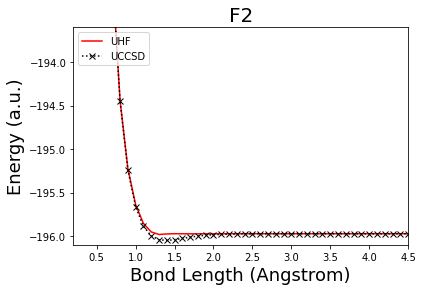

In [7]:
# plot UHF UCCSD 
import matplotlib.pyplot as plt
plt.title("F2", fontsize=20)
plt.xlabel("Bond Length (Angstrom)", fontsize=18)
plt.ylabel("Energy (a.u.)", fontsize=18)
plt.plot(distance, energy_UHF, 'r-',label = 'UHF')
plt.plot(distance, energy_UCCSD, 'kx:',label = 'UCCSD')
plt.legend(loc = 2)
plt.ylim(-196.1, -193.6)
plt.xlim(0.2, 4.5)
plt.show()

## plot all

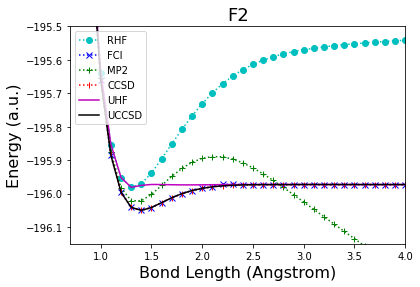

In [8]:
import matplotlib.pyplot as plt
plt.title("F2", fontsize=18)
plt.xlabel("Bond Length (Angstrom)", fontsize=16)
plt.ylabel("Energy (a.u.)", fontsize=16)
plt.plot(distance, energy_RHF, 'co:', label = 'RHF')
plt.plot(distance, energy_FCI,'bx:', label = 'FCI')
plt.plot(distance, energy_MP2, 'g+:', label = 'MP2')
plt.plot(distance, energy_CCSD, 'r|:',label = 'CCSD')
plt.plot(distance, energy_UHF, 'm-', label = 'UHF')
plt.plot(distance, energy_UCCSD, 'k-',label = 'UCCSD')
plt.legend(loc = 2)
plt.ylim(-196.15, -195.5)
plt.xlim(0.7,4.0)
plt.savefig('./F2_sto3g.tiff', dpi=300,bbox_inches='tight')
plt.show()

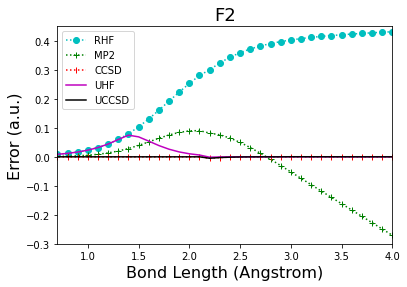

In [7]:
import matplotlib.pyplot as plt
plt.title("F2", fontsize=18)
plt.xlabel("Bond Length (Angstrom)", fontsize=16)
plt.ylabel("Error (a.u.)", fontsize=16)
plt.plot(distance, energy_RHF-energy_FCI, 'co:', label = 'RHF')
#plt.plot(distance, energy_FCI,'bx:', label = 'FCI')
plt.plot(distance, energy_MP2-energy_FCI, 'g+:', label = 'MP2')
plt.plot(distance, energy_CCSD-energy_FCI, 'r|:',label = 'CCSD')
plt.plot(distance, energy_UHF-energy_FCI, 'm-', label = 'UHF')
plt.plot(distance, energy_UCCSD-energy_FCI, 'k-',label = 'UCCSD')
plt.legend(loc = 2)
plt.ylim(-0.3, 0.45)
plt.xlim(0.7,4.0)
#plt.savefig('./F2_sto3g.tiff', dpi=300,bbox_inches='tight')
plt.show()